<a href="https://colab.research.google.com/github/vinny956/MyRepository/blob/master/CreditCardFraudAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the dataset and reading the file

In [ ]:
 from  google.colab import files
 

In [ ]:
pip install -q kaggle

In [ ]:
upload=files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls -lrt

total 8
drwxr-xr-x 1 root root 4096 Jul 10 16:29 sample_data
-rw-r--r-- 1 root root   74 Jul 27 16:03 kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 76% 50.0M/66.0M [00:00<00:00, 61.3MB/s]
100% 66.0M/66.0M [00:00<00:00, 96.6MB/s]


In [ ]:
!ls 

creditcardfraud.zip  kaggle.json  sample_data


In [ ]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
original=pd.read_csv('creditcard.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train=original
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
batchsize=500

In [ ]:
v1=train['V1']
v2=train['V2']
btch=0
for x ,y in zip([v1[i:i+batchsize] for i in range(0,len(v1),batchsize)],[v2[i:i+batchsize] for i in range(0,len(v1),batchsize)]):
  btch+=1
  print(x)
  print(y)

Streaming output truncated to the last 5000 lines.
            ...   
180995   -0.554663
180996   -0.454409
180997   -0.564029
180998   -0.526424
180999    1.178418
Name: V2, Length: 500, dtype: float64
181000    2.080843
181001   -1.092457
181002    2.035623
181003    2.399433
181004   -0.903504
            ...   
181495   -0.963151
181496    2.226874
181497   -0.557513
181498   -1.528365
181499   -2.681130
Name: V1, Length: 500, dtype: float64
181000   -1.137067
181001    1.191951
181002    0.111125
181003   -1.088919
181004   -1.876930
            ...   
181495    0.782607
181496    0.129978
181497    0.096865
181498    0.030916
181499   -3.401228
Name: V2, Length: 500, dtype: float64
181500   -0.276854
181501    1.952316
181502    2.127583
181503    2.079831
181504    2.205345
            ...   
181995    0.038020
181996    2.310711
181997    1.874068
181998   -0.749787
181999    1.842349
Name: V1, Length: 500, dtype: float64
181500    0.423595
181501   -0.808006
181502   -0.020550

# Checking for null values and column types 

In [ ]:
train.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [ ]:
train.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
train.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null values in the **data** 


# Converting target variable to categorical

In [ ]:
train_dummy=train
train.Class=pd.Categorical(train.Class)
train_dummy.Class=pd.Categorical(train_dummy.Class)

# descriptive statistics and checking the distribution of target variable

In [ ]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


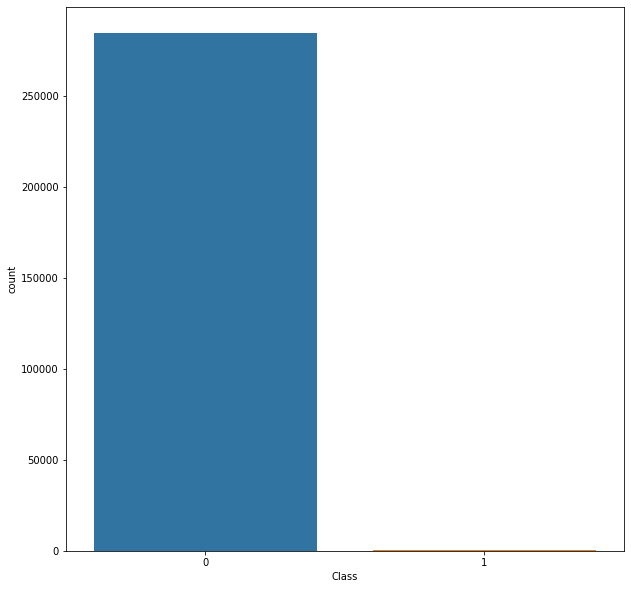

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Class',data=train)

In [ ]:
print('No. of fraud transactions is '+str(len(train[train['Class']==1])))
print('No . of Clean transactions is'+str(len(train[train['Class']==0])))
print ('percntage of Fraud transactions is ' + str((train[train['Class']==1].count()/train['Class'].count()*100)[0]))


No. of fraud transactions is 492
No . of Clean transactions is284315
percntage of Fraud transactions is 0.1727485630620034


By above inference, its clearly 17 transactions in 10000 are Fraud. It may also suggests that , we cannot drop any outlier or extreme values. because if we drop, there is a high chance of missing these Fraudalent transactions

In [ ]:
 train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


# Check mean and median for the data

Lets find differnce between means and medians as below

In [ ]:
for col in train.drop(columns='Class').columns:
  Mean=train[col].mean()
  Median=train[col].median()
  print ('Mean value is  {0} Median value is {1}'.format(Mean,Median))
  diff=Mean-Median
  print ('Mean and median differnece of   is{0} '.format(diff))
  #print('unique values of  '+ col +' is ' + str(train.drop(columns='Time').unique()))

Mean value is  94813.85957508067 Median value is 84692.0
Mean and median differnece of   is10121.85957508067 
Mean value is  3.919560084655042e-15 Median value is 0.0181087991615309
Mean and median differnece of   is-0.01810879916152698 
Mean value is  5.688174400270728e-16 Median value is 0.0654855563960555
Mean and median differnece of   is-0.06548555639605493 
Mean value is  -8.76907126289773e-15 Median value is 0.17984634356354398
Mean and median differnece of   is-0.17984634356355275 
Mean value is  2.782312291808533e-15 Median value is -0.0198465294811989
Mean and median differnece of   is0.01984652948120168 
Mean value is  -1.5525630329923732e-15 Median value is -0.0543358267364858
Mean and median differnece of   is0.054335826736484245 
Mean value is  2.010663493875542e-15 Median value is -0.27418707650665103
Mean and median differnece of   is0.274187076506653 
Mean value is  -1.694249132734738e-15 Median value is 0.0401030827945351
Mean and median differnece of   is-0.040103082

In [ ]:
train_dummy=train
for col in train_dummy.drop(columns='Class').columns():
  

In [ ]:
for col in train.columns:
  print('number of unique values in ' +col+' is '+ str(train[col].nunique()))

number of unique values in Time is 124592
number of unique values in V1 is 275663
number of unique values in V2 is 275663
number of unique values in V3 is 275663
number of unique values in V4 is 275663
number of unique values in V5 is 275663
number of unique values in V6 is 275663
number of unique values in V7 is 275663
number of unique values in V8 is 275663
number of unique values in V9 is 275663
number of unique values in V10 is 275663
number of unique values in V11 is 275663
number of unique values in V12 is 275663
number of unique values in V13 is 275663
number of unique values in V14 is 275663
number of unique values in V15 is 275663
number of unique values in V16 is 275663
number of unique values in V17 is 275663
number of unique values in V18 is 275663
number of unique values in V19 is 275663
number of unique values in V20 is 275663
number of unique values in V21 is 275663
number of unique values in V22 is 275663
number of unique values in V23 is 275663
number of unique values 

# Univariate analysis of the variables by distribution plot

Lets check for individual distrubtions of all the continous variables in the dataset


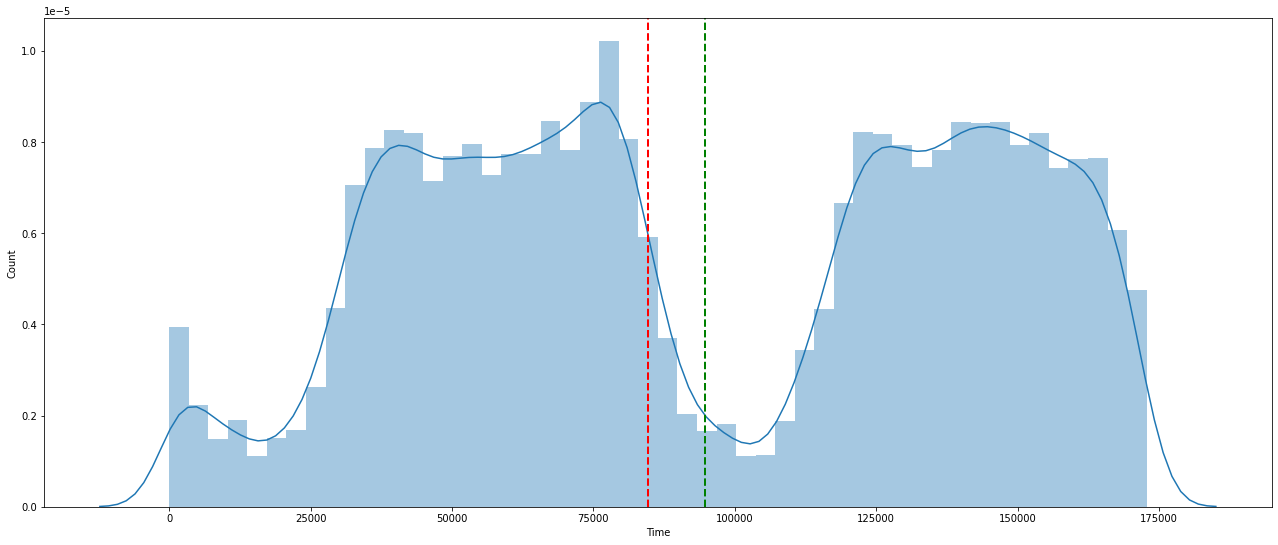

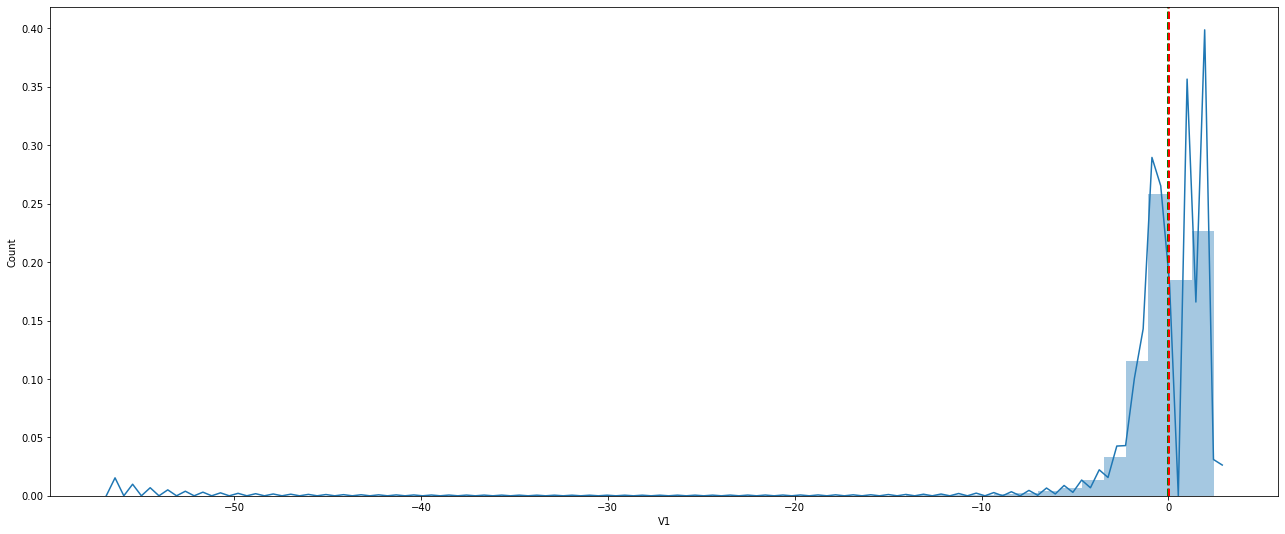

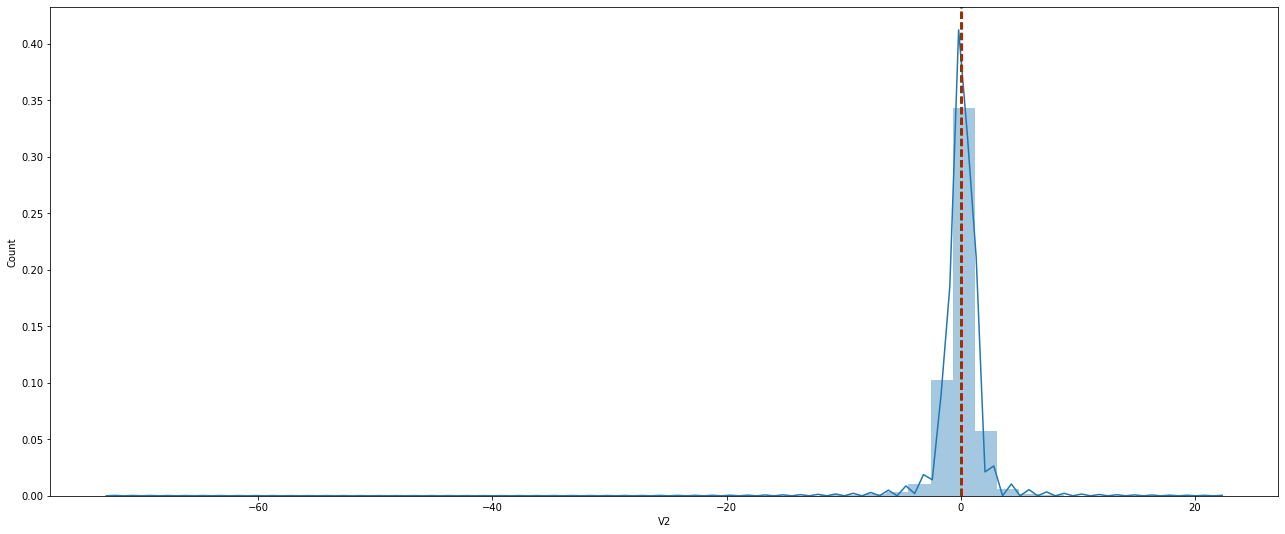

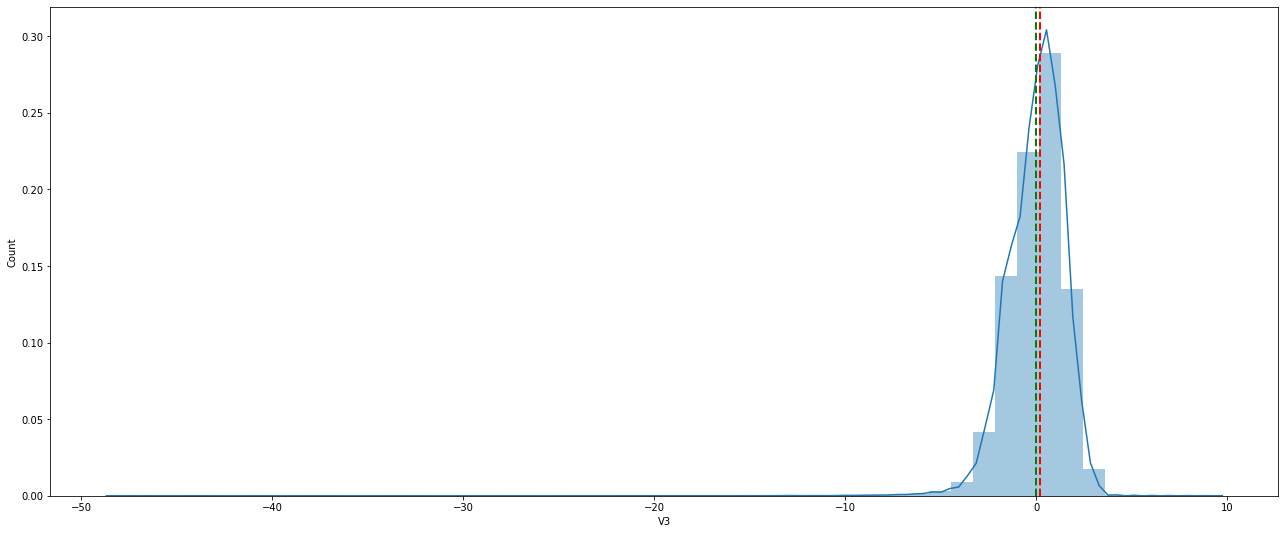

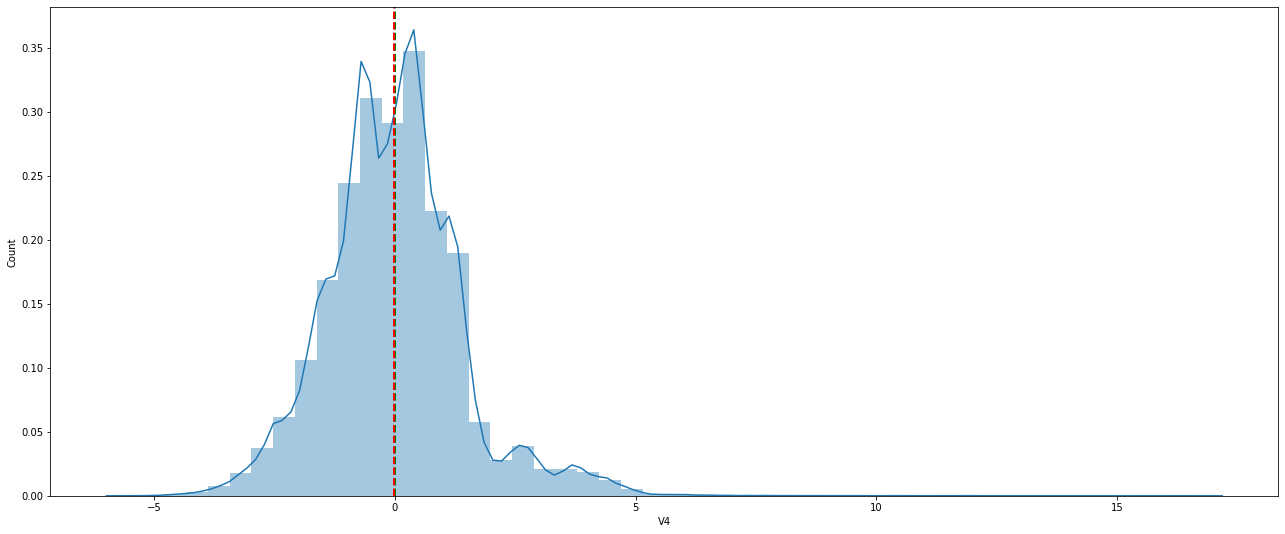

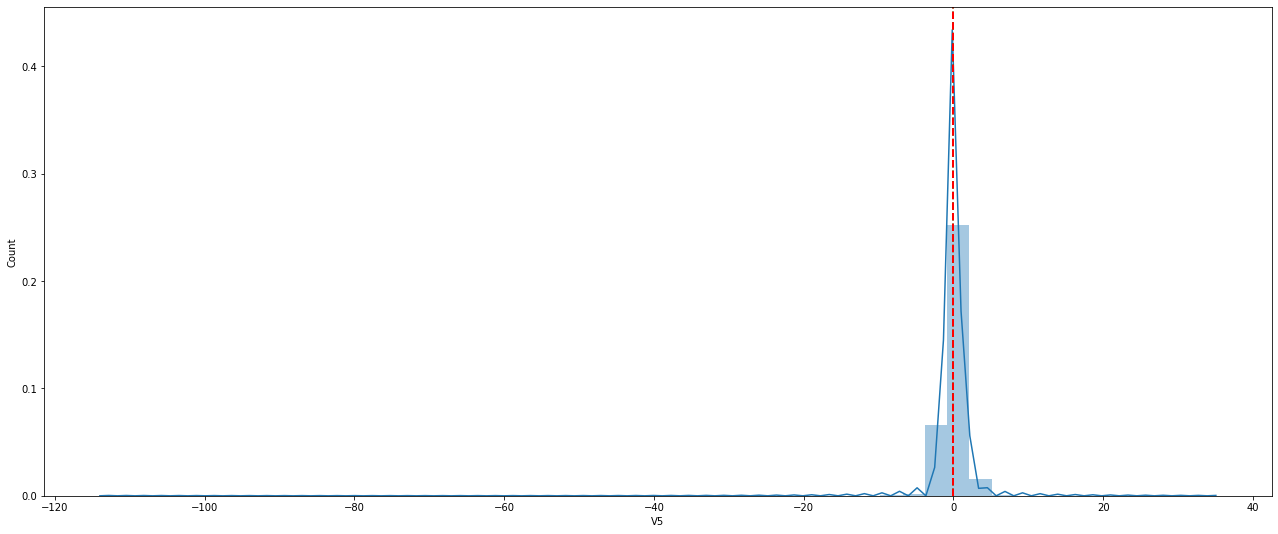

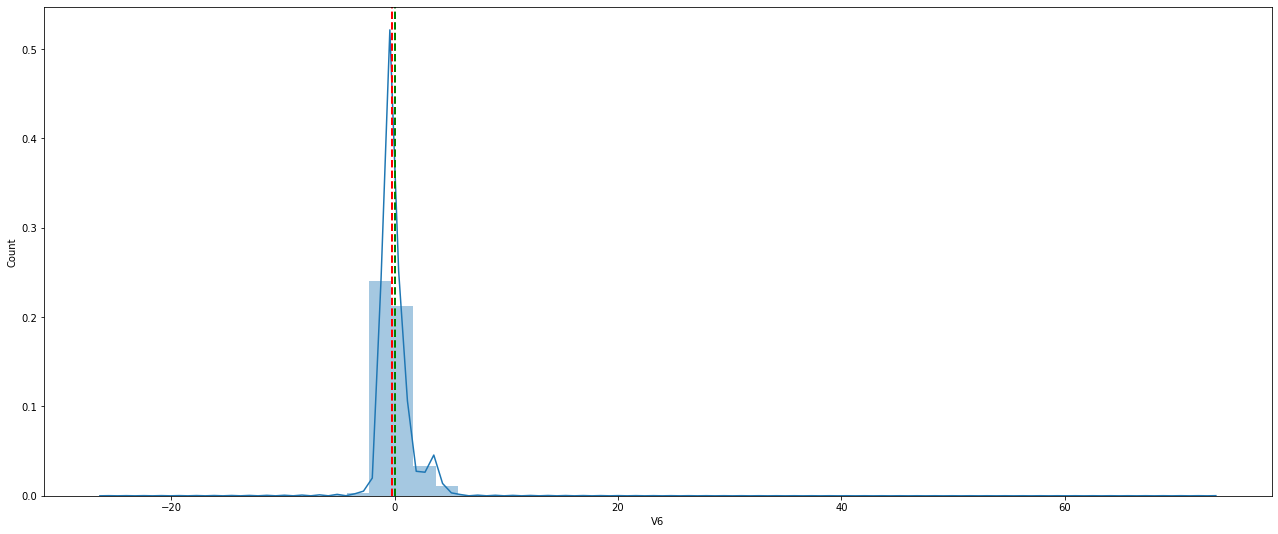

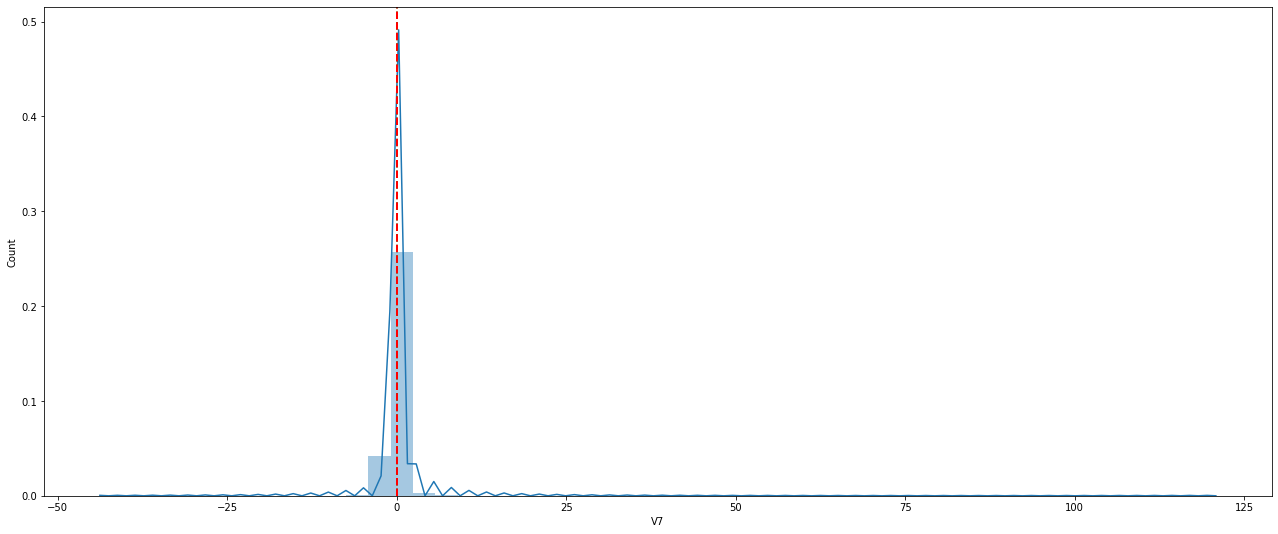

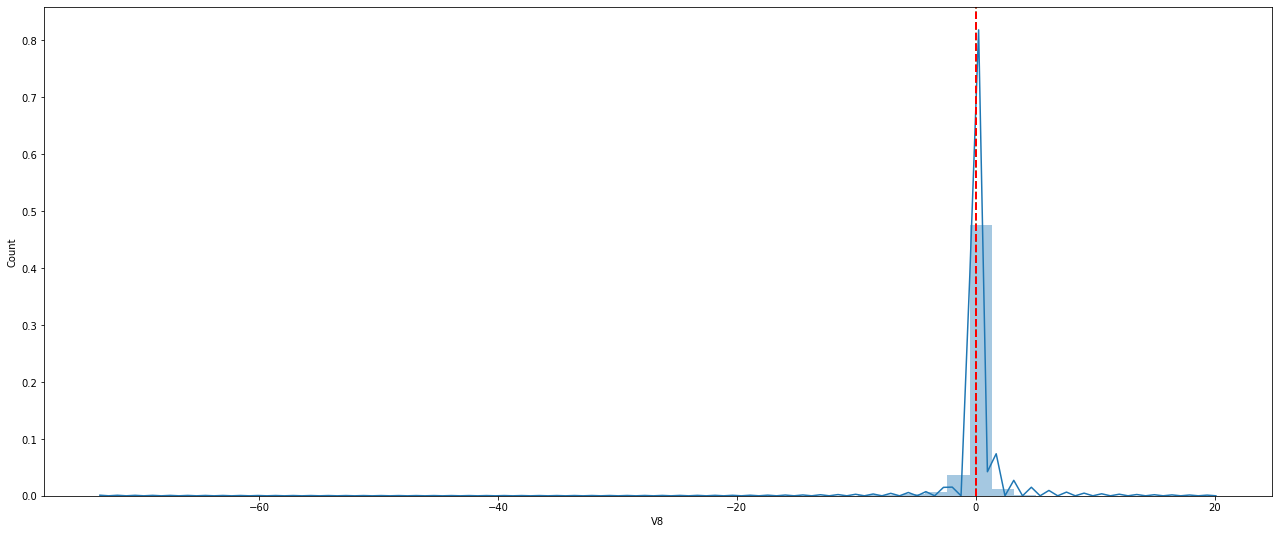

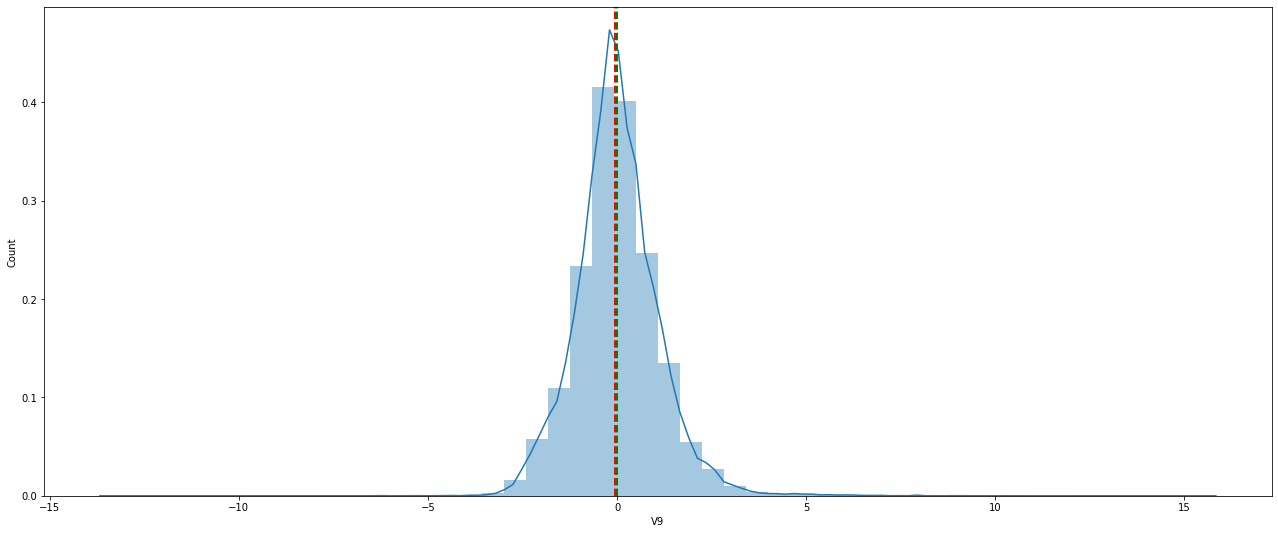

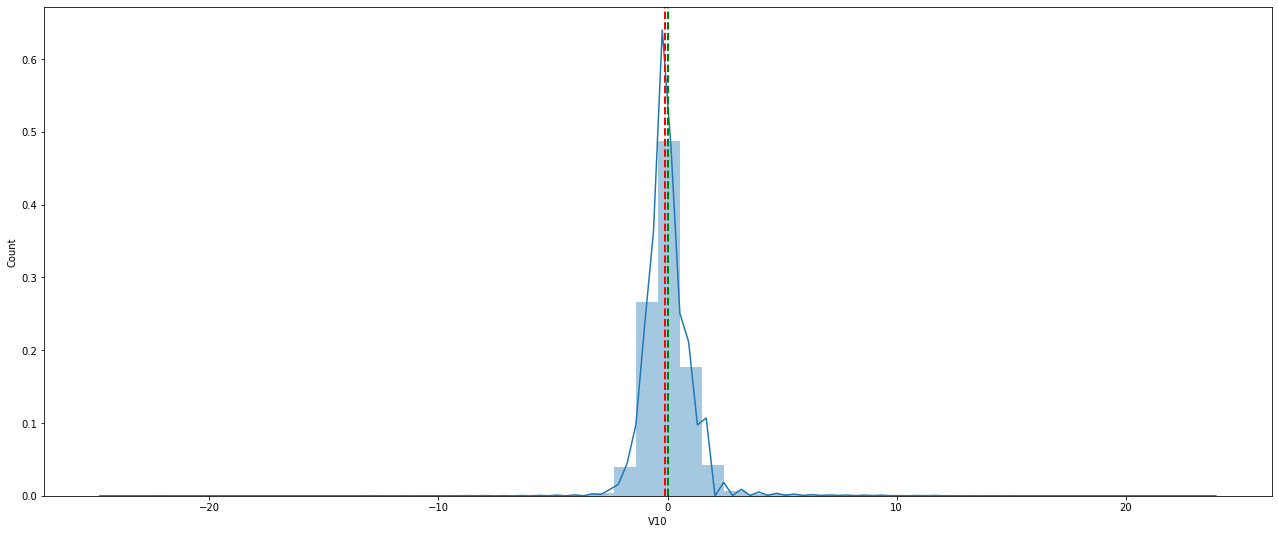

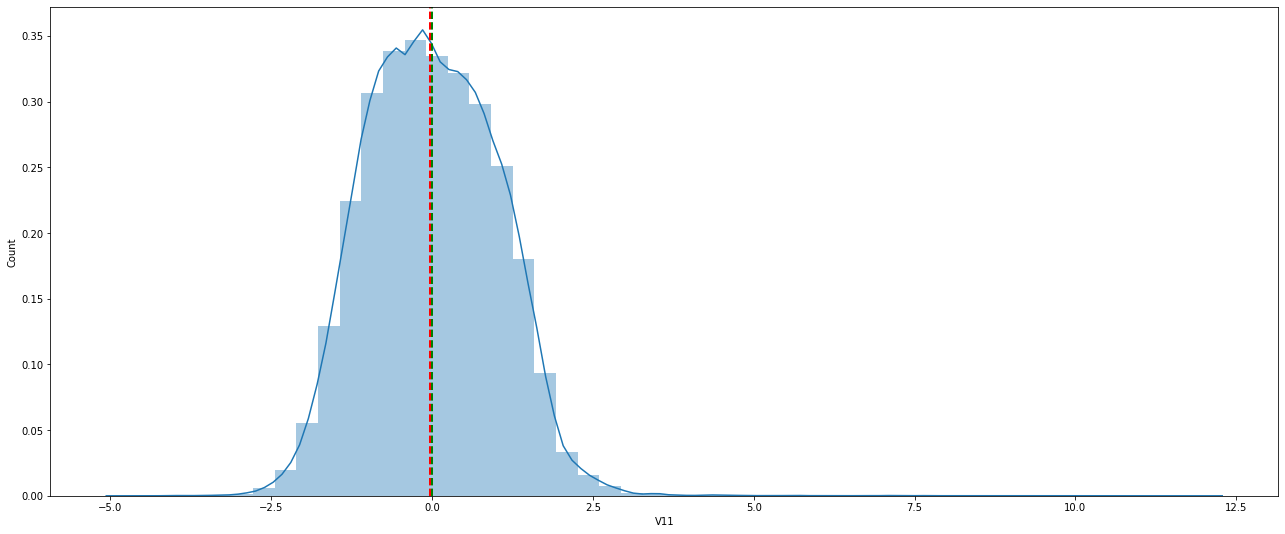

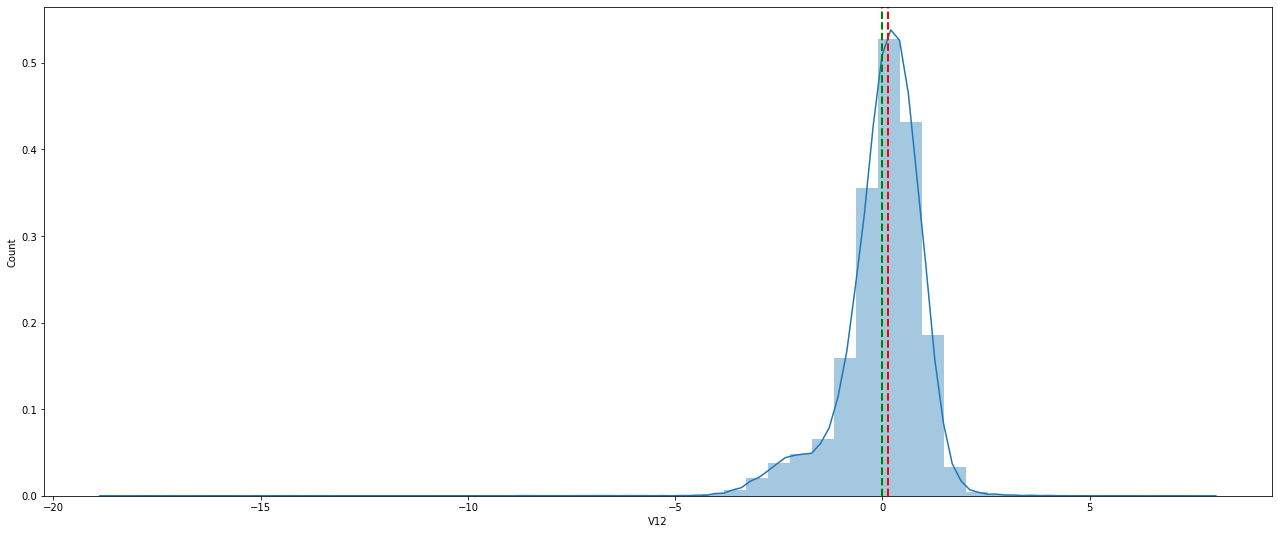

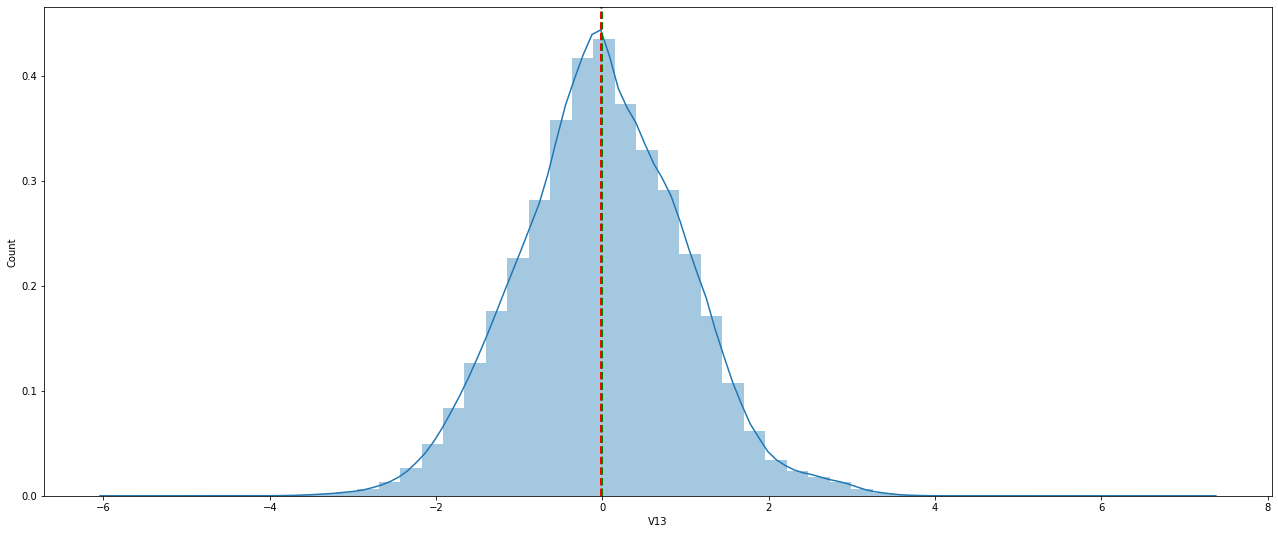

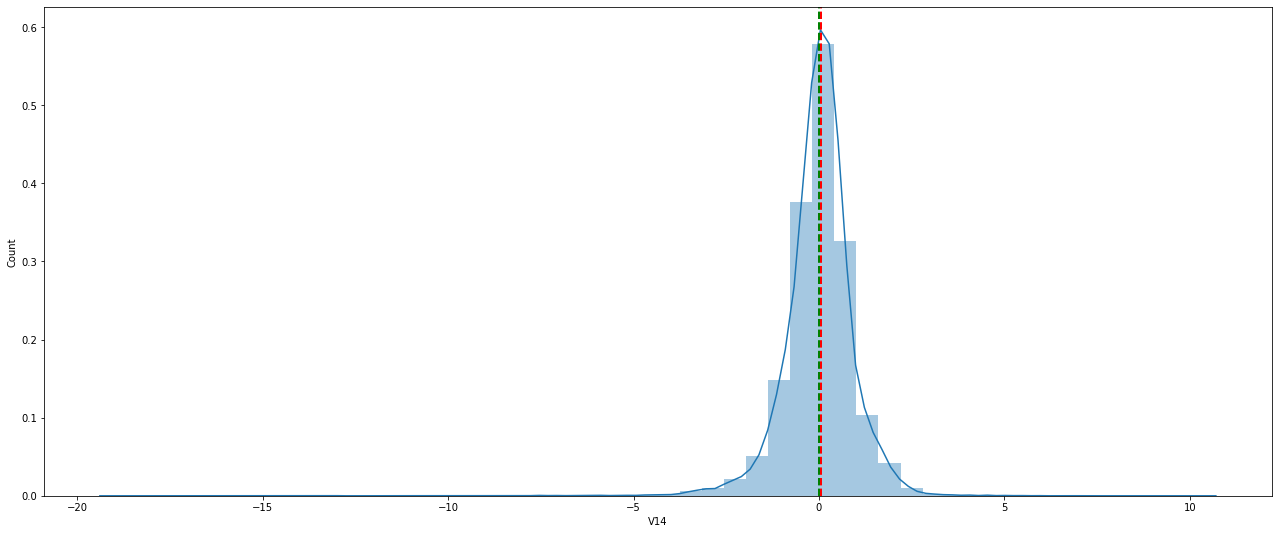

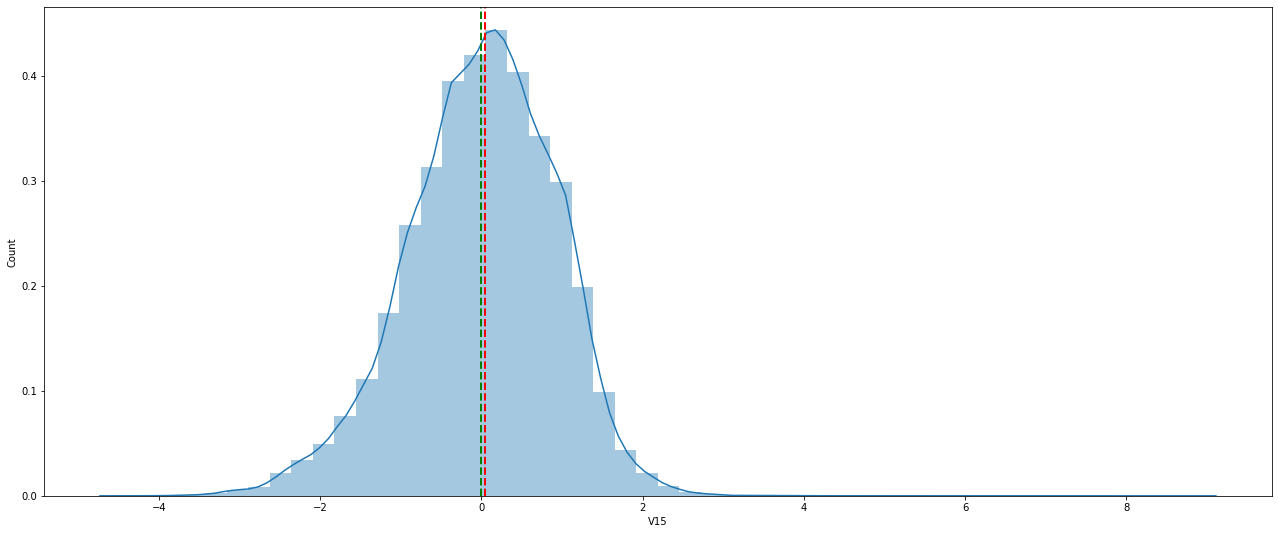

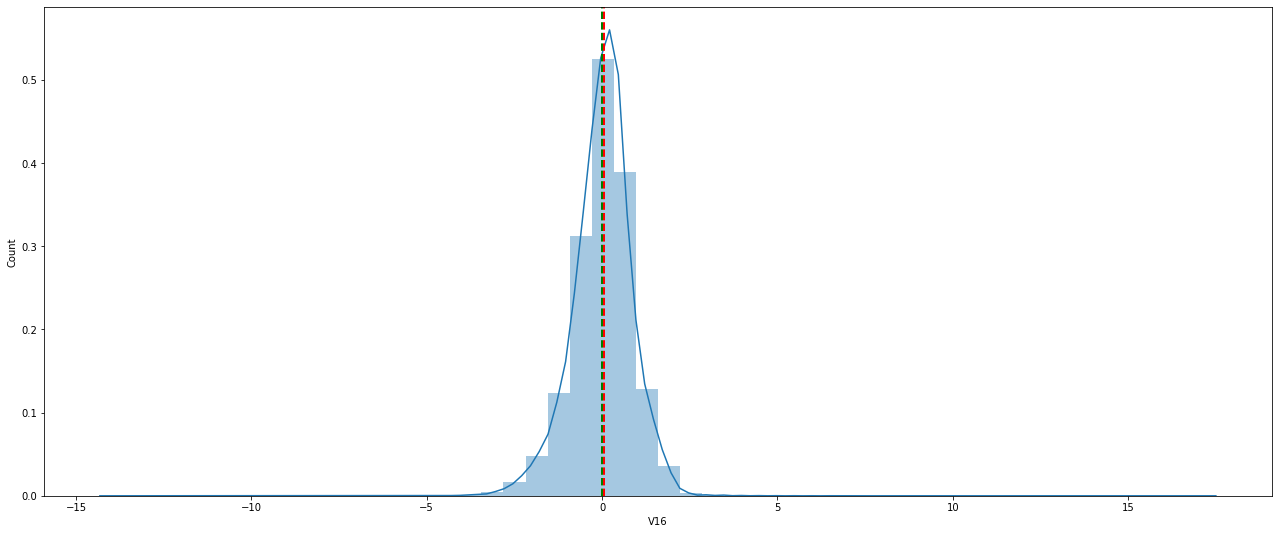

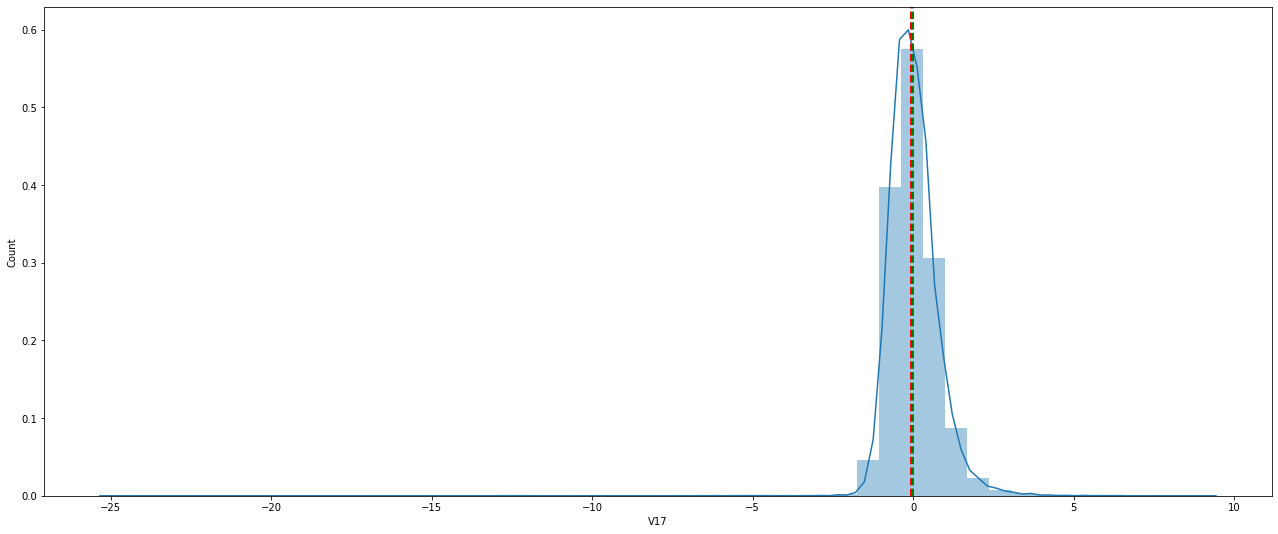

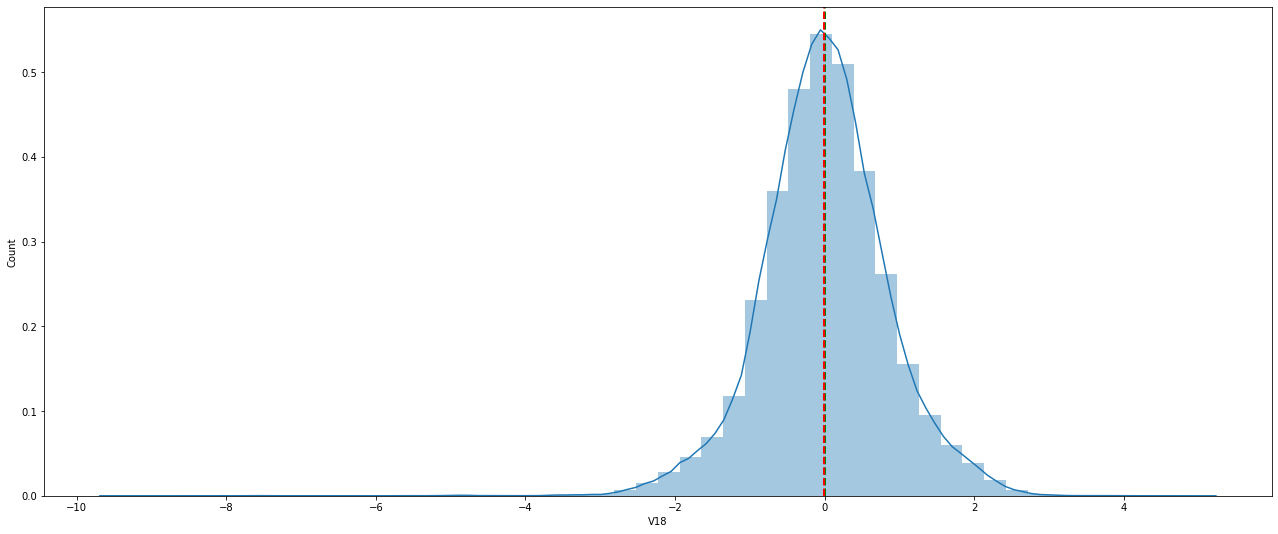

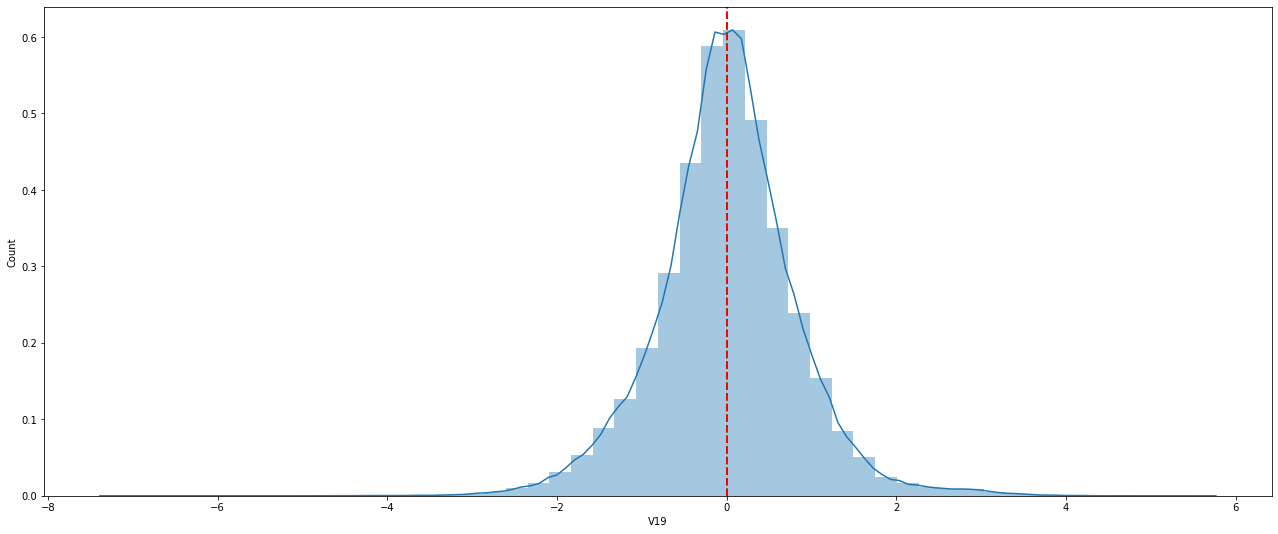

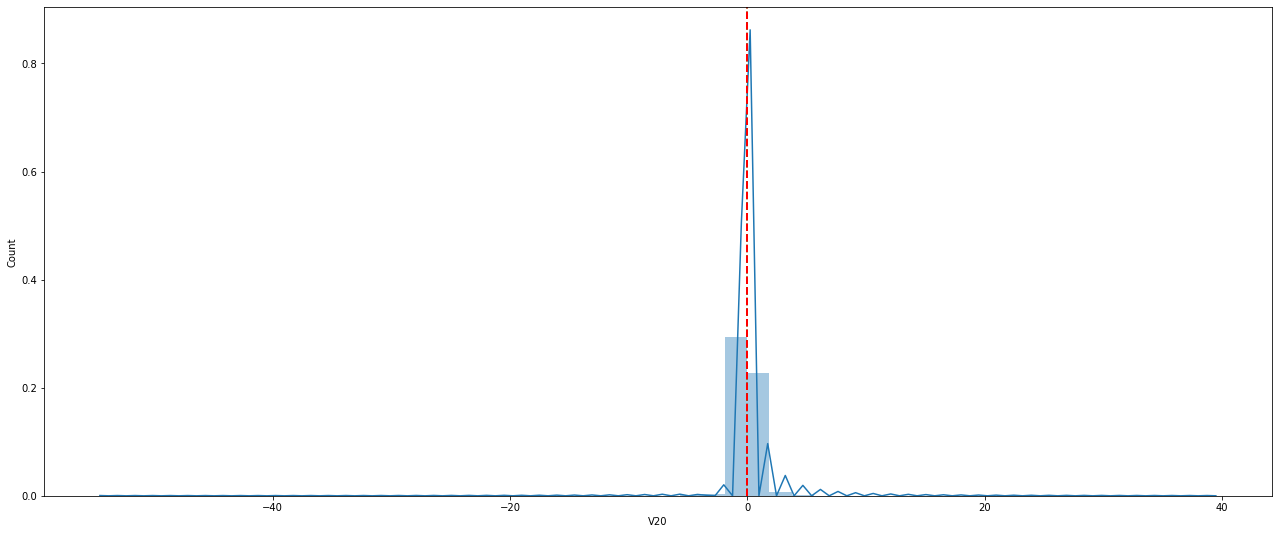

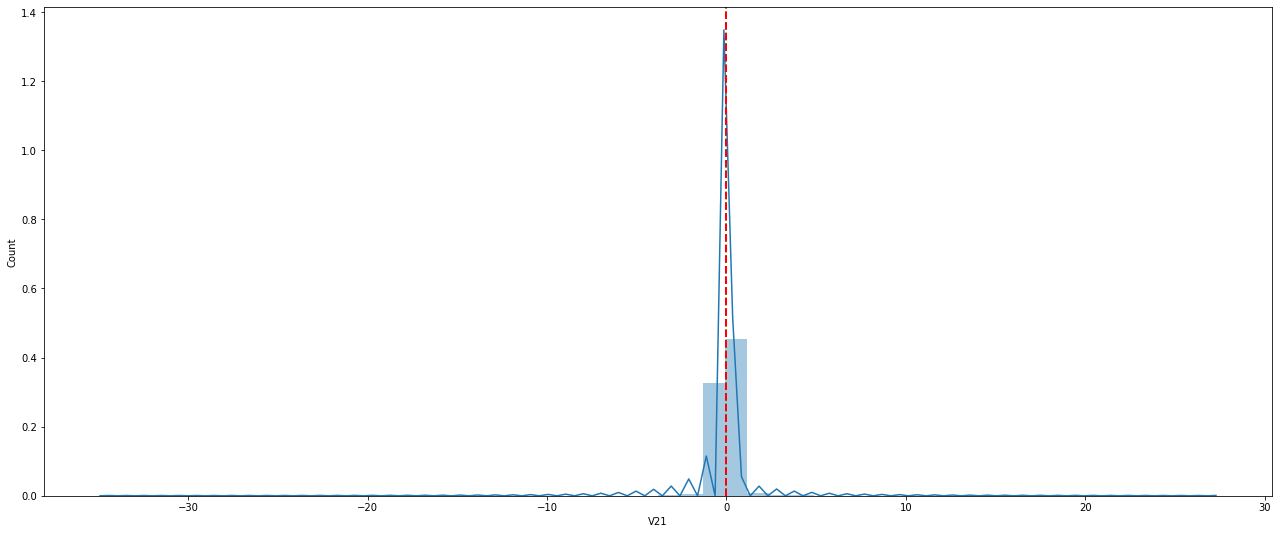

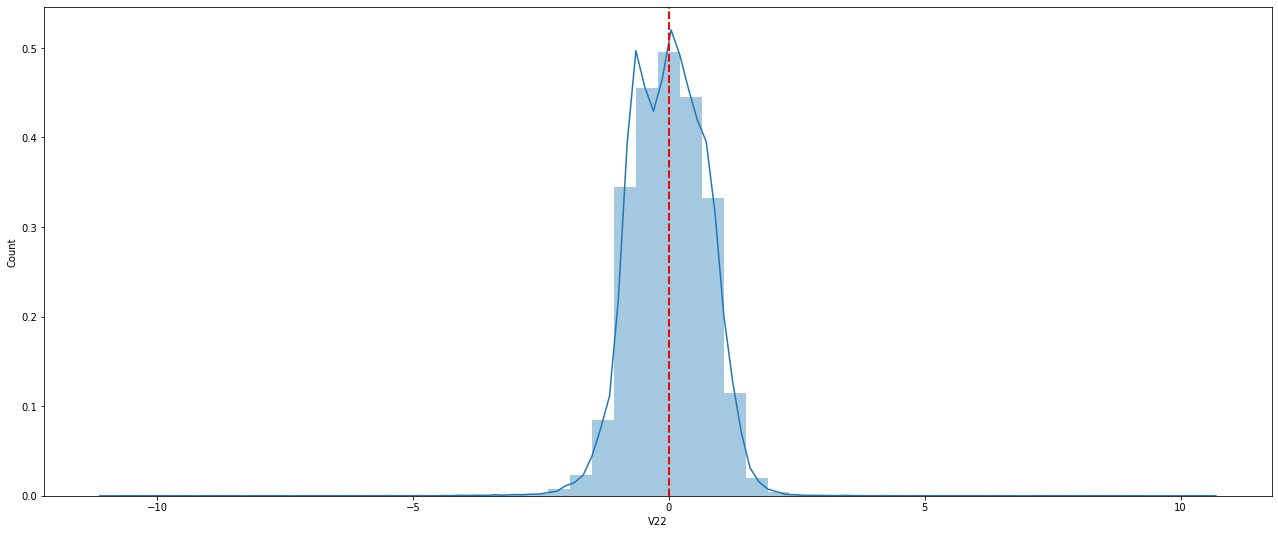

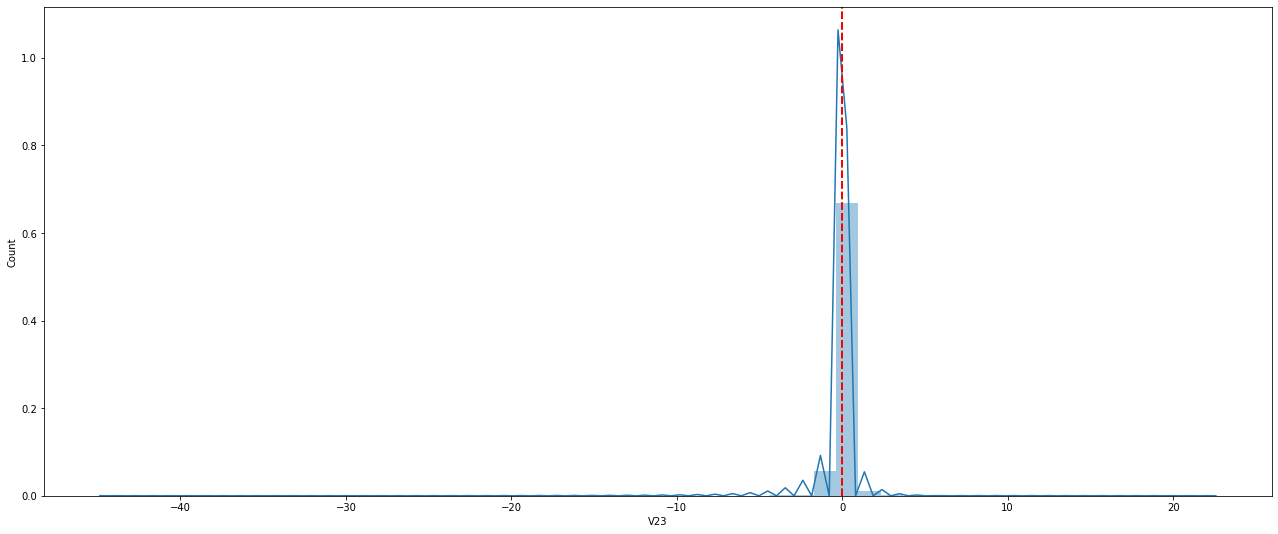

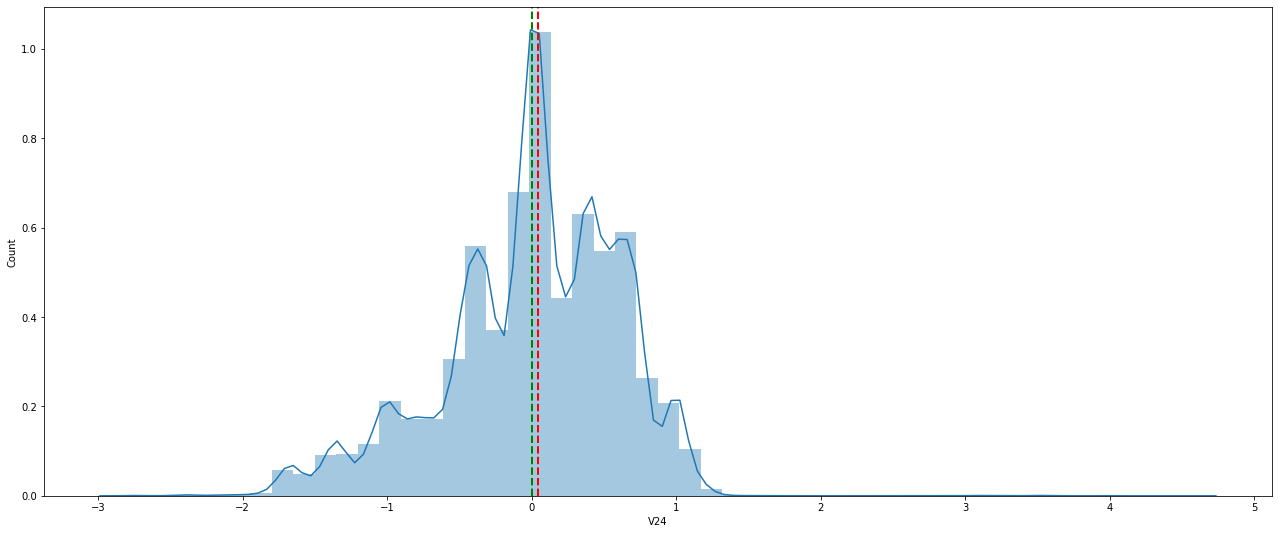

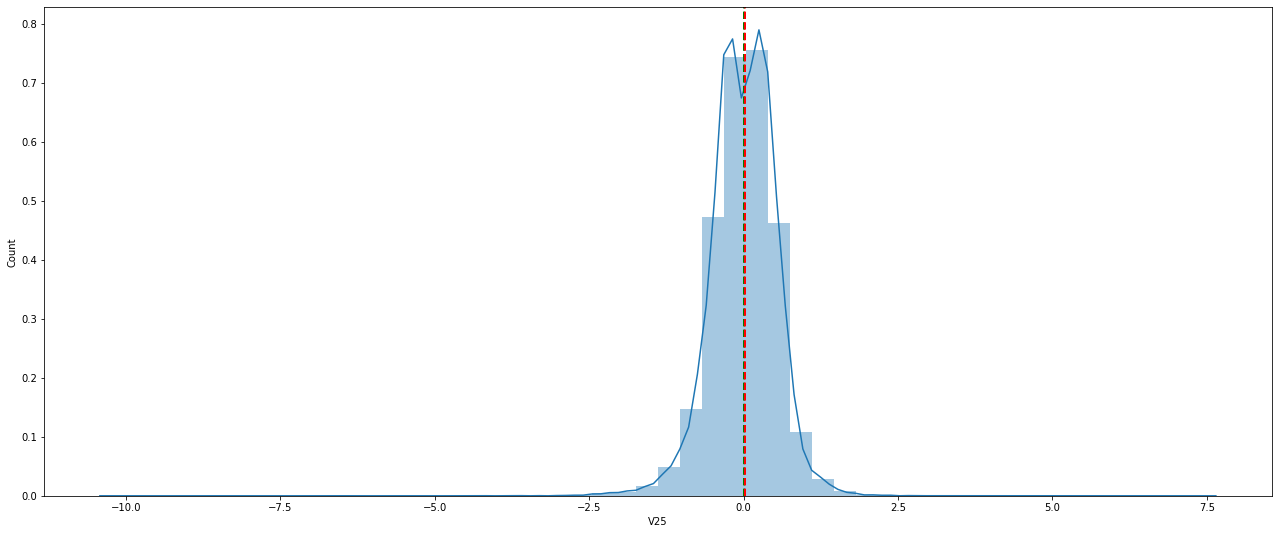

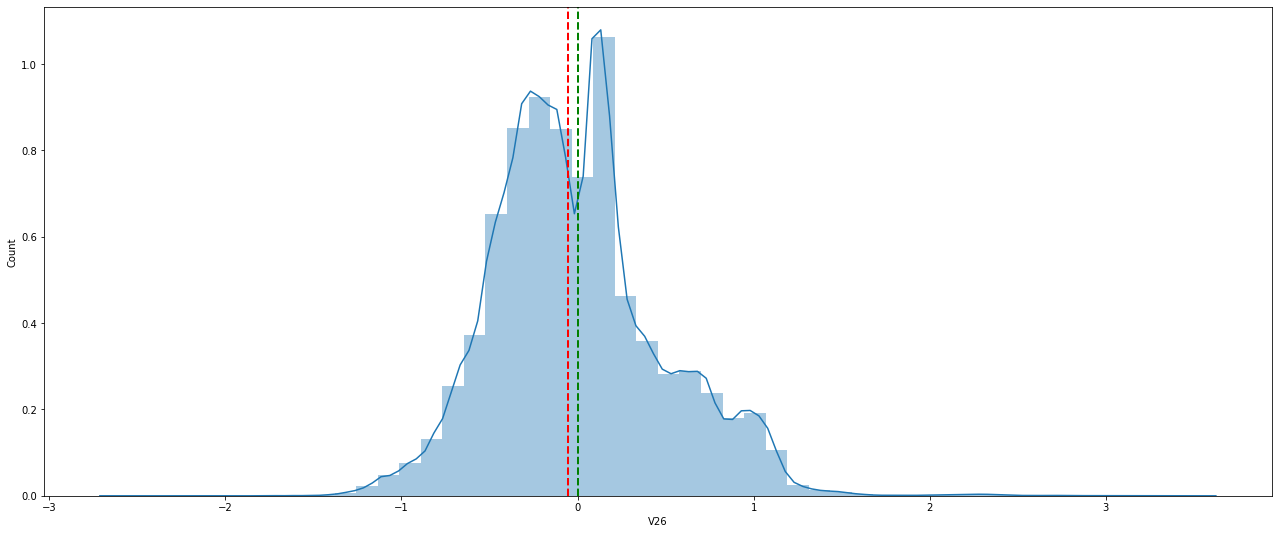

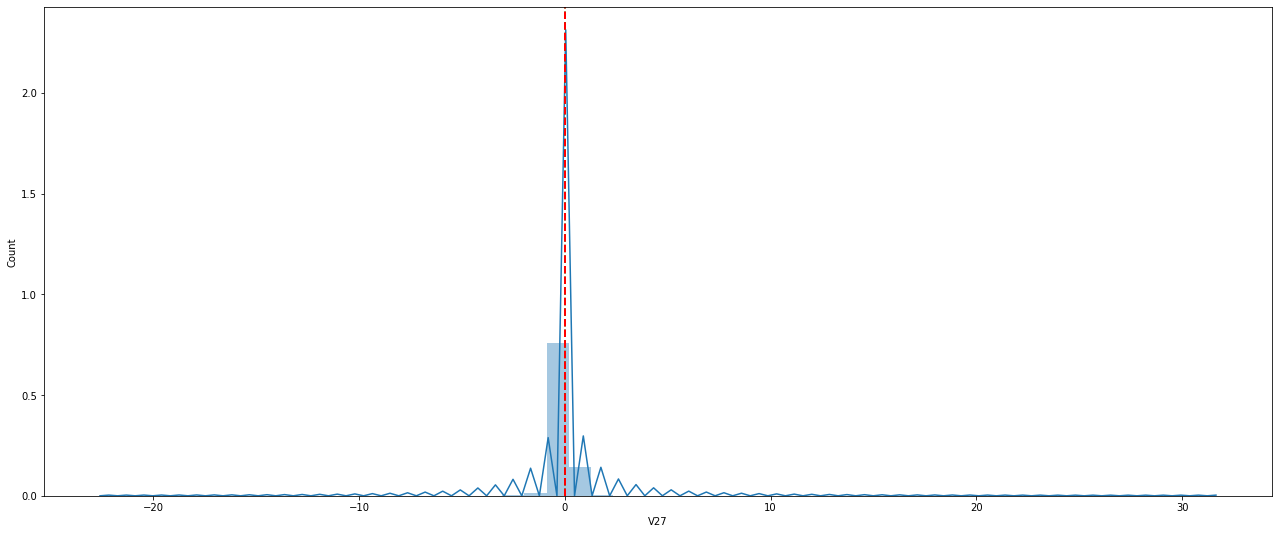

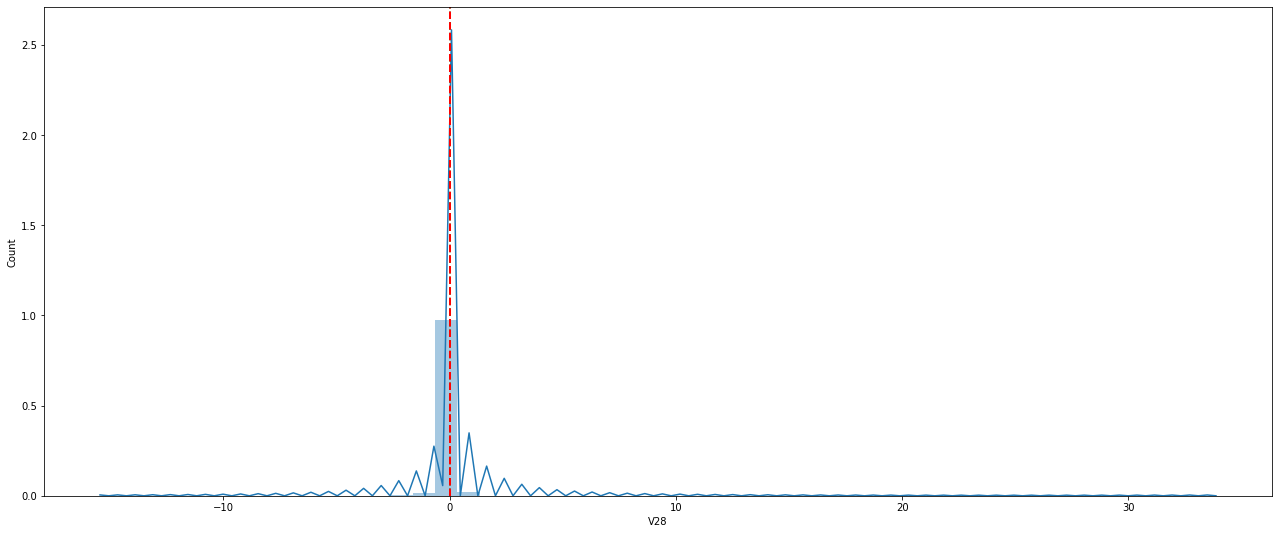

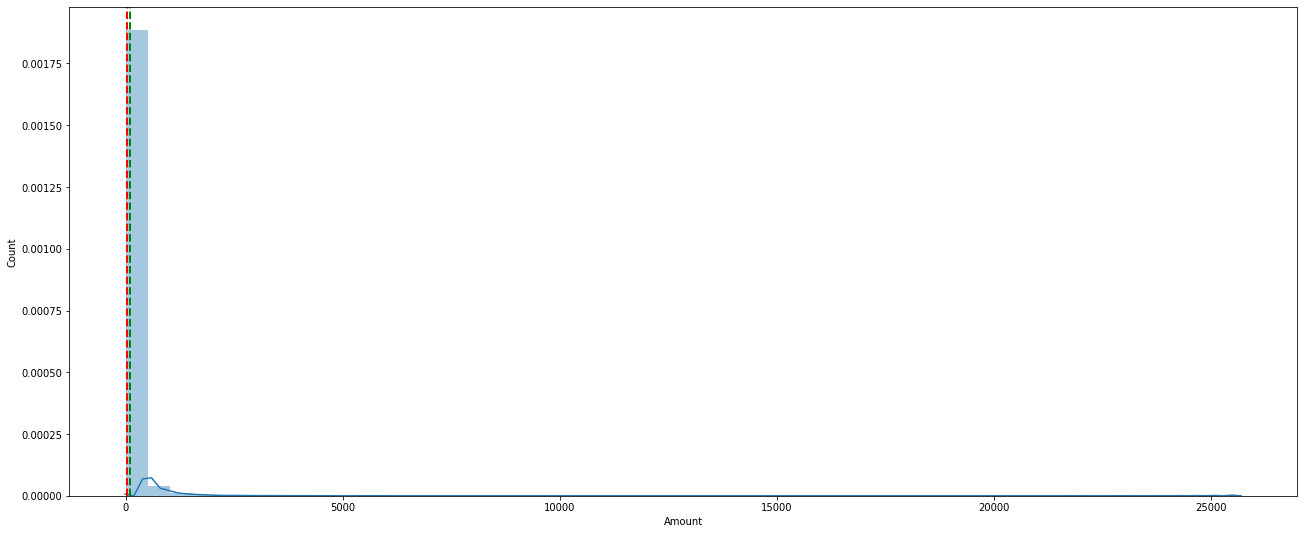

In [ ]:
contColumns=list(train.drop(columns='Class').columns)
for col in contColumns:
  plt.figure(figsize=(22,9))
  sns.distplot(train[col])
  plt.axvline(train[col].mean(),linestyle='dashed',c='g',linewidth='2',label='Mean')
  plt.axvline(train[col].median(),linestyle='dashed',c='r',linewidth='2',label='Median')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

# Analysis of Time variable and converting it to categorical

For variable called **Time** , there seems to be two distributions. Mean, Median are between the two distributions. Ideally the data has to be spread around mean.  This graph is not showing us complete details. We need to check whether this variable has any impact . But the variable **Time** is ordinal data unlike other variables. Its not ideal to take a mean of ordinal data.  
Another look at variable time , Median stands at a point of 85000 which is a complete day. These are the transactions happened on two differnet days. It might be possible to convert the data into categorical , with two different days



In [ ]:
train_dummy.loc[train_dummy['Time']<=86400,'Time']=1
train_dummy.loc[train_dummy['Time']>86400,'Time']=2
train_dummy


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,2.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,2.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,2.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
train_dummy.Time=pd.Categorical(train_dummy.Time)

In [ ]:
train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  category
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

# Counting the Target variable for different independent variables

In [ ]:
#train_dummy=train
#train_dummy['V1']=pd.qcut(train['V1'],60,duplicates='drop')
#figure,axs=plt.subplots(figsize=(22,9))
#sns.countplot(x='V1',data=train_dummy,hue='Class')
#plt.xticks(rotation=45)
#plt.xlabel('V1',size=15,labelpad=20)
#plt.tick_params(axis='x', labelsize=10)
#plt.tick_params(axis='y', labelsize=15)
#plt.legend(['0','1'],loc='upper right',prop={'size':15})
#plt.title('Count of transcation types   in {} Feature'.format('V1'), size=15, y=1.05)

#plt.show()

In [ ]:
#train_dummy=train
#train_dummy['V2']=pd.qcut(train['V2'],60,duplicates='drop')
#figure,axs=plt.subplots(figsize=(22,9))
##sns.countplot(x='V2',data=train_dummy,hue='Class')
#lt.xticks(rotation=45)
#plt.xlabel('V2',size=15,labelpad=20)
#plt.tick_params(axis='x', labelsize=10)
#plt.tick_params(axis='y', labelsize=15)
#plt.legend(['0','1'],loc='upper right',prop={'size':15})
#plt.title('Count of transcation types   in {} Feature'.format('V2'), size=15, y=1.05)

#plt.show()

In [ ]:
#train_dummy=train
#train_dummy['V3']=pd.qcut(train['V3'],60,duplicates='drop')
#figure,axs=plt.subplots(figsize=(22,9))
#sns.countplot(x='V3',data=train_dummy,hue='Class')
#plt.xticks(rotation=45)
#plt.xlabel('V3',size=15,labelpad=20)
#plt.tick_params(axis='x', labelsize=10)
#plt.tick_params(axis='y', labelsize=15)
#plt.legend(['0','1'],loc='upper right',prop={'size':15})
#plt.title('Count of transcation types   in {} Feature'.format('V3'), size=15, y=1.05)

#plt.show()

In [ ]:
#train_dummy=train
#train_dummy['Amount']=pd.qcut(train['Amount'],60,duplicates='drop')
#figure,axs=plt.subplots(figsize=(22,9))
#sns.countplot(x='Amount',data=train_dummy,hue='Class')
#plt.xticks(rotation=45)
#plt.xlabel('Amount',size=15,labelpad=20)
#plt.tick_params(axis='x', labelsize=10)
#plt.tick_params(axis='y', labelsize=15)
#plt.legend(['0','1'],loc='upper right',prop={'size':15})
#plt.title('Count of transcation types   in {} Feature'.format('Amount'), size=15, y=1.05)

#plt.show()

# target variable distribution per Time variable

Lets find out the relationship between Day and Fraudalent transactions by countplot


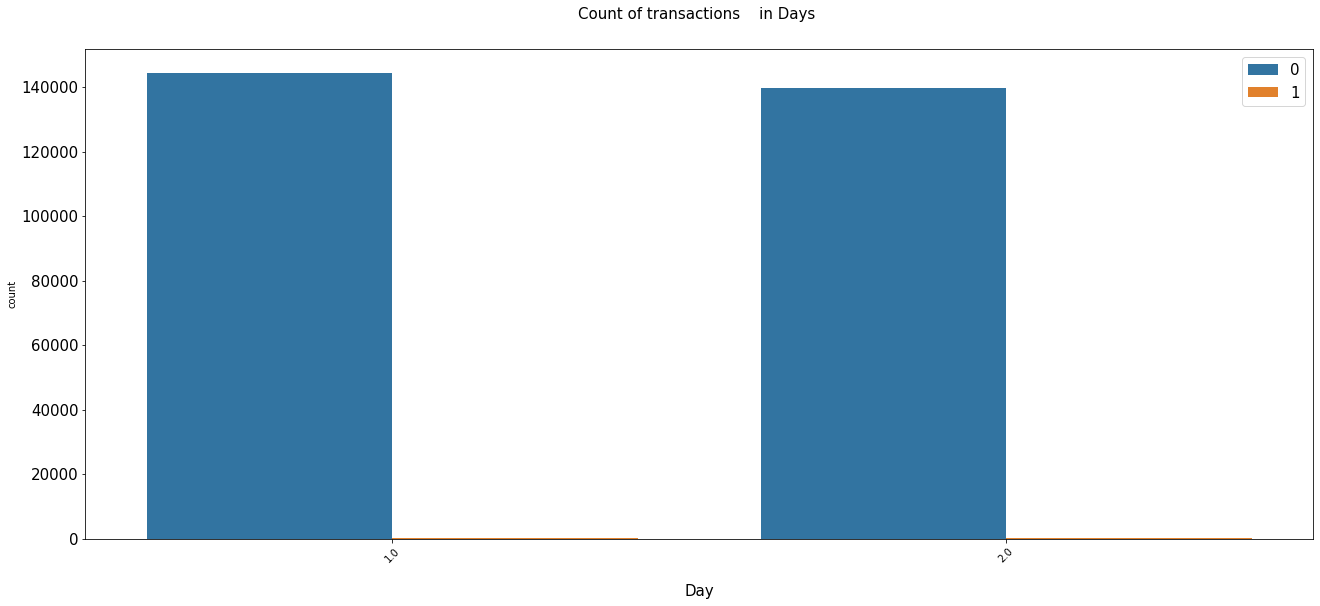

In [ ]:
#train_dummy=train
figure,axs=plt.subplots(figsize=(22,9))
sns.countplot(x='Time',data=train_dummy,hue='Class')
plt.xticks(rotation=45)
plt.xlabel('Day',size=15,labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['0','1'],loc='upper right',prop={'size':15})
plt.title('Count of transactions    in {} '.format('Days'), size=15, y=1.05)

plt.show()

In [ ]:
print('No. of fraud transactions on day 1 is '+str(len(train_dummy[(train_dummy['Class']==1) & (train_dummy['Time']==1)])))
print('No . of Clean transactions on day 1  is'+str(len(train_dummy[train_dummy['Time']==1])))
print('No. of fraud transactions on day 2 is '+str(len(train_dummy[(train_dummy['Class']==1) & (train_dummy['Time']==2)])))
print('No . of Clean transactions on day 2  is'+str(len(train_dummy[train_dummy['Time']==2])))
print ('percentage of Fraud transactions on day 1  is ' + str(train_dummy[(train_dummy['Class']==1) & (train_dummy['Time']==1)].count()[0]/train_dummy['Class'].count()*100))
print ('percentage of Fraud transactions on day 2  is ' + str(train_dummy[(train_dummy['Class']==1) & (train_dummy['Time']==2)].count()[0]/train_dummy['Class'].count()*100))


No. of fraud transactions on day 1 is 281
No . of Clean transactions on day 1  is144787
No. of fraud transactions on day 2 is 211
No . of Clean transactions on day 2  is140020
percentage of Fraud transactions on day 1  is 0.09866330532606292
percentage of Fraud transactions on day 2  is 0.07408525773594048


From above we can notice that fraud transactions is proportional to the total transactions on a particular day

If we observe , for all the continous variables , mean stands at zero apart from amount 

# Lets check whether there is any significant differnece of amount between fraud transactions and non fraud transactions

We will be performing **Hypothesis Testing of two sample** by considering fraud transactions as one sample , and clean transactions as another sample

**H0**: there is no significant differnece of amount between fraud transactions and clean transactions(status quo)

**Ha**: there is significant difference of amount between Fraud transactions and clean transactions(what we are trying to prove)

In [ ]:
import scipy.stats as stats


Lets perform levene's test to check whether there is equal variance between amount of  clean transactions and fraud transactions

In [ ]:
stats.levene(train_dummy[train_dummy['Class']==1]['Amount'],train_dummy[train_dummy['Class']==0]['Amount'])

LeveneResult(statistic=12.684214894874506, pvalue=0.0003688154902664781)

From above , p value is less, it says there is no equal variance. In this case we will explicitly mention equal variance as false

In [ ]:
stats.ttest_ind(train_dummy[train_dummy['Class']==1]['Amount'],train_dummy[train_dummy['Class']==0]['Amount'],equal_var=False)

Ttest_indResult(statistic=2.928789530856467, pvalue=0.003560518851710299)

From above, we can see **p** value is less than 0.01(99 percent siginficance). We reject null hypothesis . there is significant difference of mean amount between Fraud transactions and clean transactions 

# Outliers check in all the variables

Lets only foucs on outliers in the variables with respect to Fraud and non Fraud transactions

---



In [ ]:
for col in train.drop(['Time','Class'],axis=1).columns:
  temp=train.loc[(train[col]>(train[col].quantile(0.75)+1.5*(train[col].quantile(0.75)-train[col].quantile(0.25))))|(train[col]<(train[col].quantile(0.25)-1.5*(train[col].quantile(0.75)-train[col].quantile(0.25))))][[col,'Class']]
  print('Number of outliers in {0} columns is {1} and number of fraud transactions in outliers is {2} '.format(col,temp.count()[0],temp.loc[temp['Class']==1].count()[0]))
  #print('percentage of fraud transactions in outliers in {} with respect to entire data set is {:.9f}'.format(temp.loc[temp['Class']==1].count()[0]/train.count()[0]))
  print('percentage of fraud transactions in outliers is {0}'.format(temp.loc[temp['Class']==1].count()[0]/temp['Class'].count()* 100))
  print('fraud transactions percentage in outlier in {0} is greater than entire dataset by {1} percent %'.format (col,(temp.loc[temp['Class']==1].count()[0]/temp['Class'].count()* 100-0.1727485630620034)/0.1727485630620034*100))

Number of outliers in V1 columns is 7062 and number of fraud transactions in outliers is 174 
percentage of fraud transactions in outliers is 2.463891248937978
fraud transactions percentage in outlier in V1 is greater than entire dataset by 1326.2875506834932 percent %
Number of outliers in V2 columns is 13526 and number of fraud transactions in outliers is 246 
percentage of fraud transactions in outliers is 1.8187195031790626
fraud transactions percentage in outlier in V2 is greater than entire dataset by 952.8131006949579 percent %
Number of outliers in V3 columns is 3363 and number of fraud transactions in outliers is 312 
percentage of fraud transactions in outliers is 9.27743086529884
fraud transactions percentage in outlier in V3 is greater than entire dataset by 5270.482220433266 percent %
Number of outliers in V4 columns is 11148 and number of fraud transactions in outliers is 318 
percentage of fraud transactions in outliers is 2.852529601722282
fraud transactions percentage 

If we observe, except **V24**, **V26** varaibles, Fraud transactions in outliers are higher compared to the entire dataset

Lets observe these details in box plot as below:

---



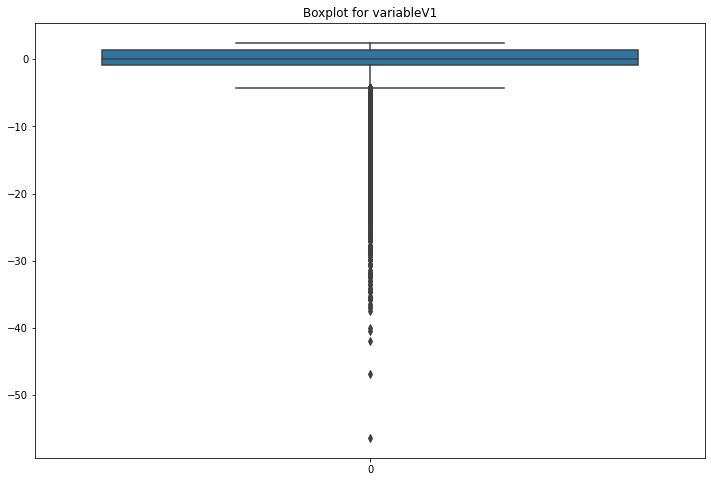

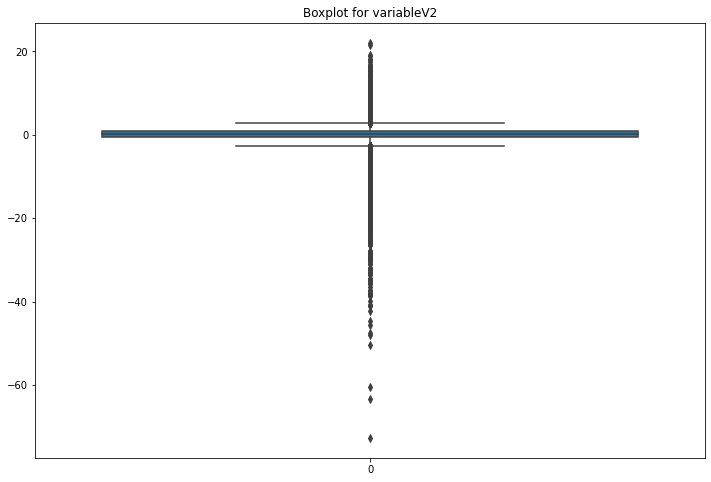

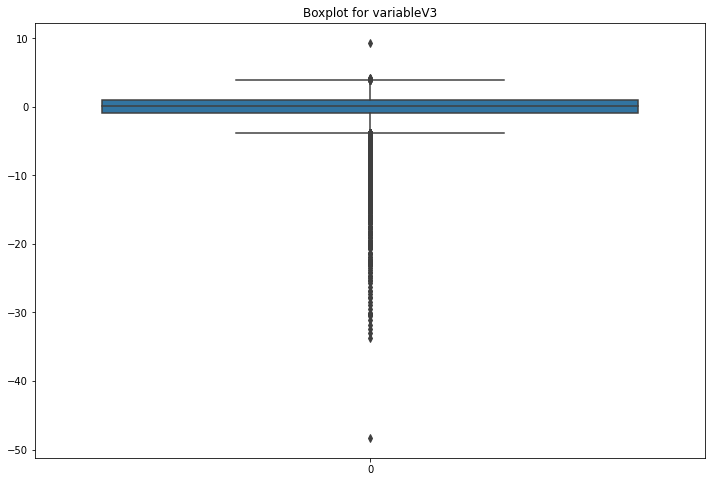

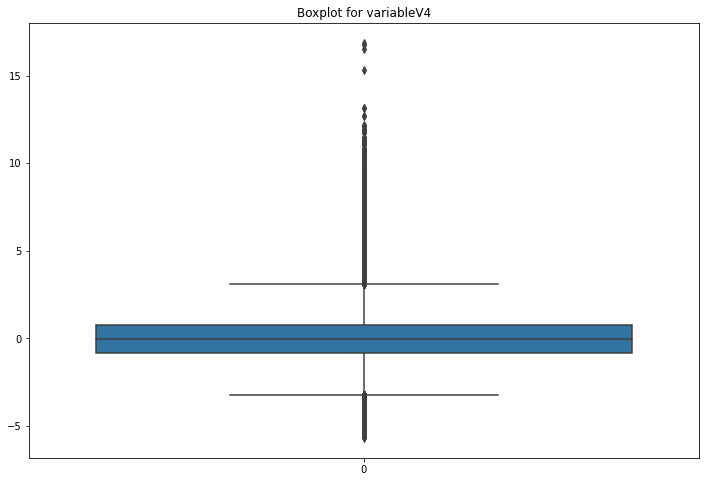

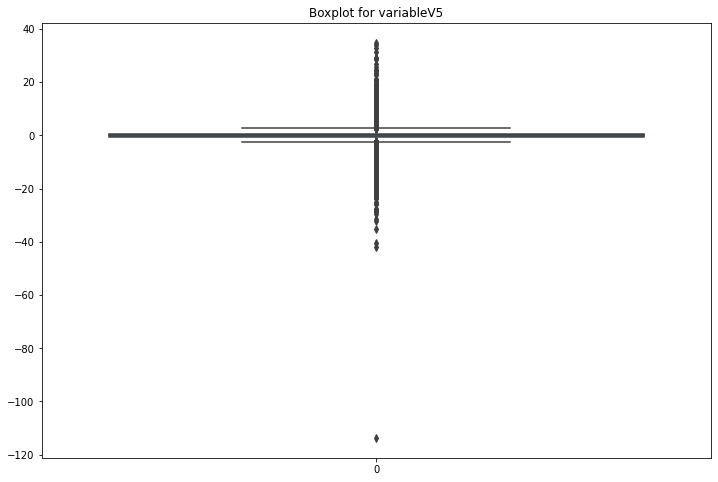

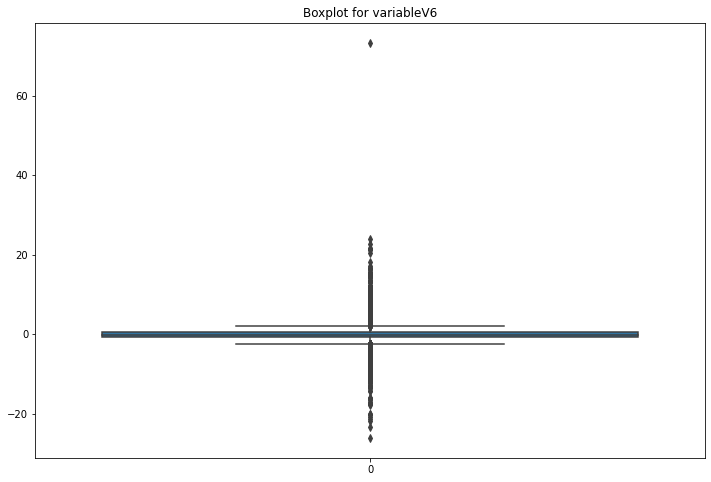

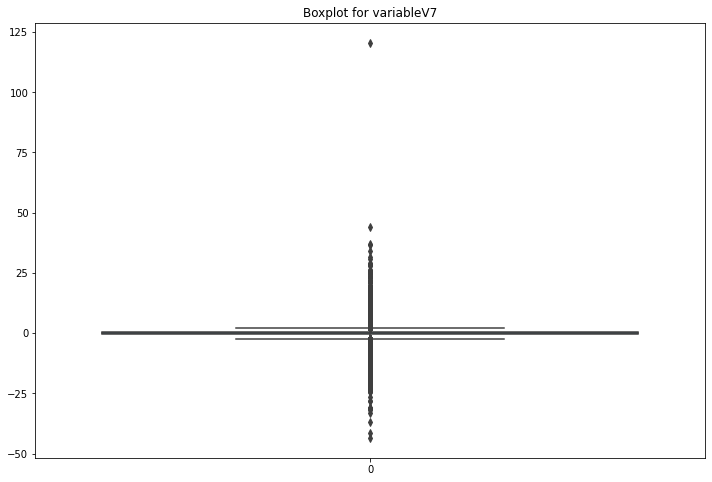

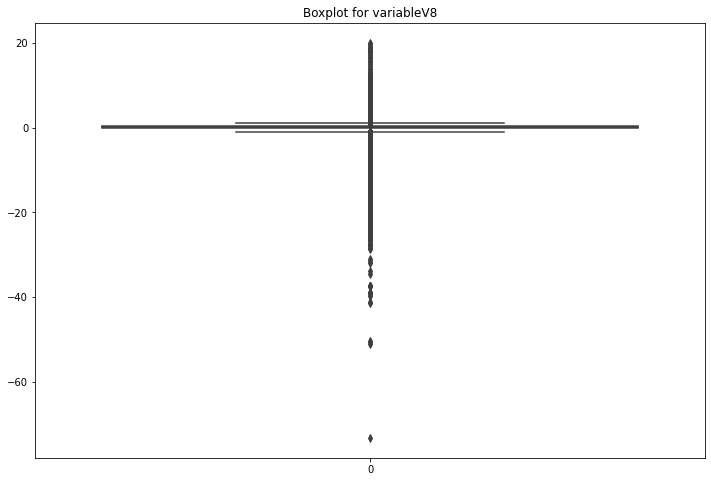

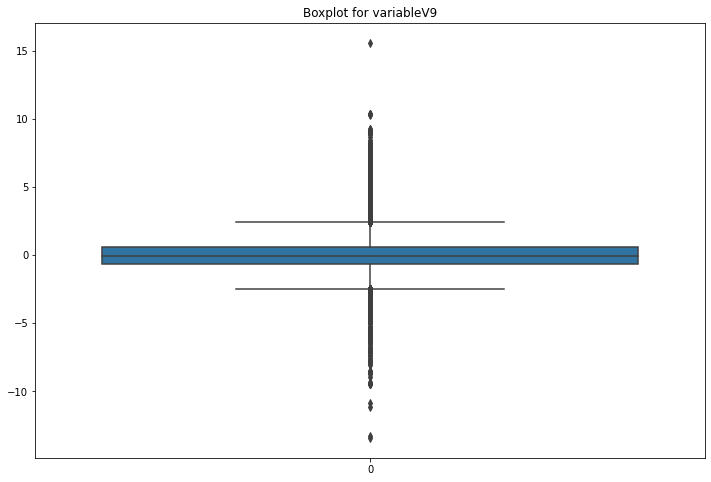

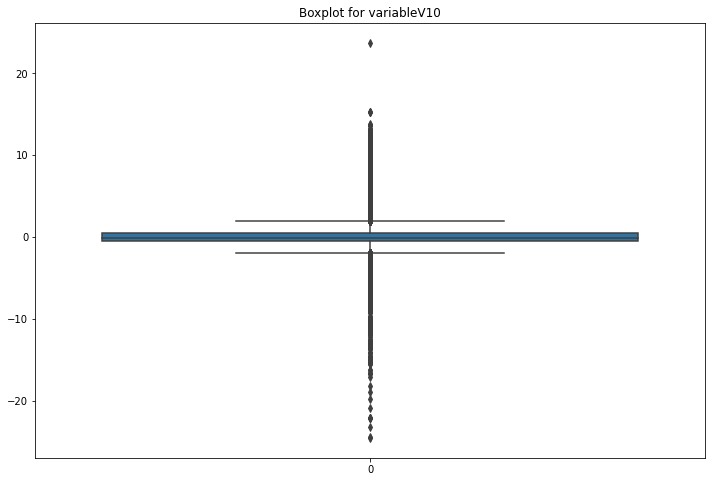

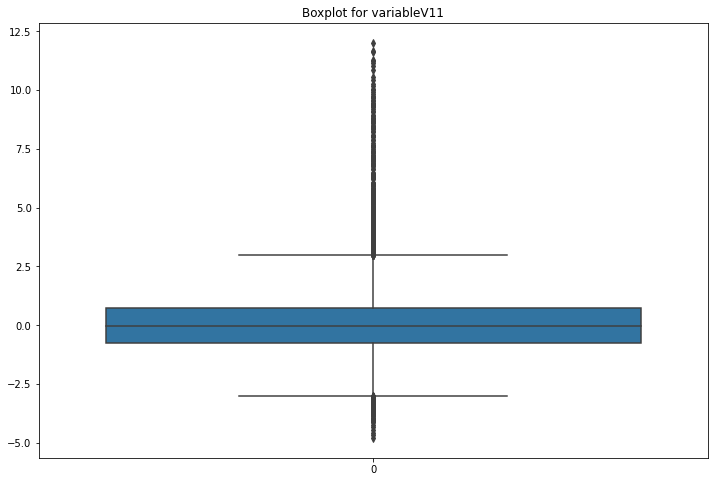

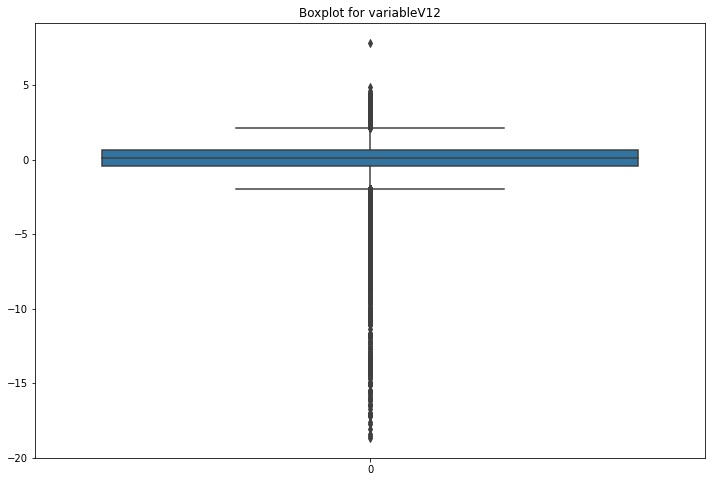

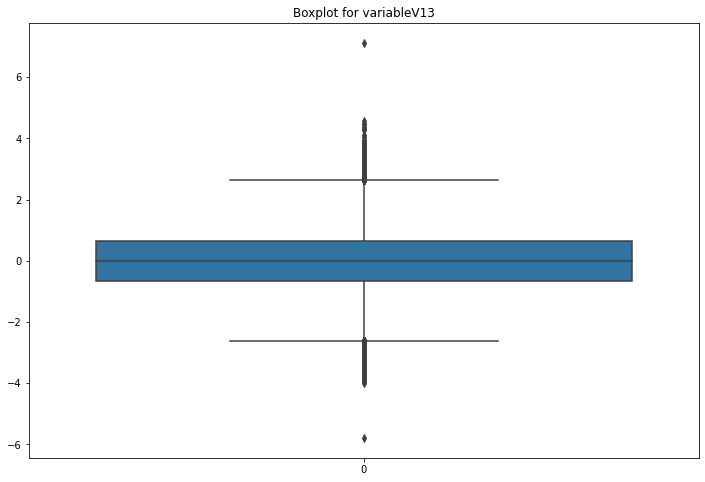

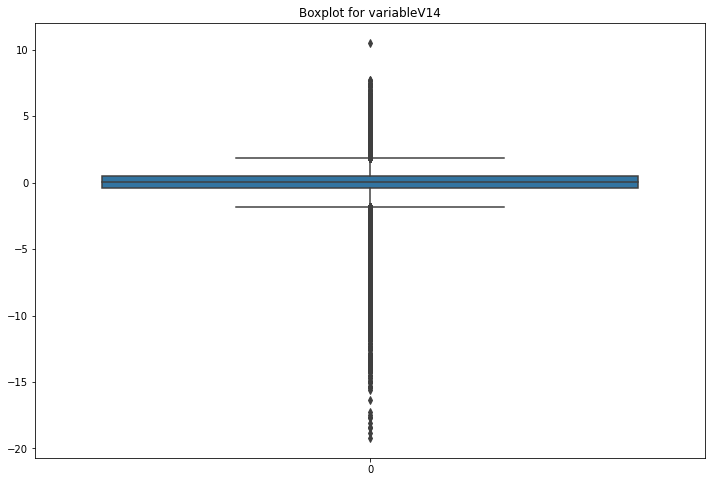

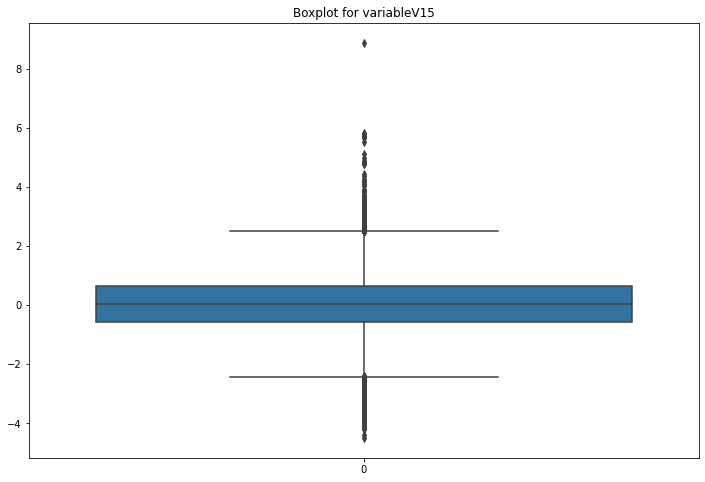

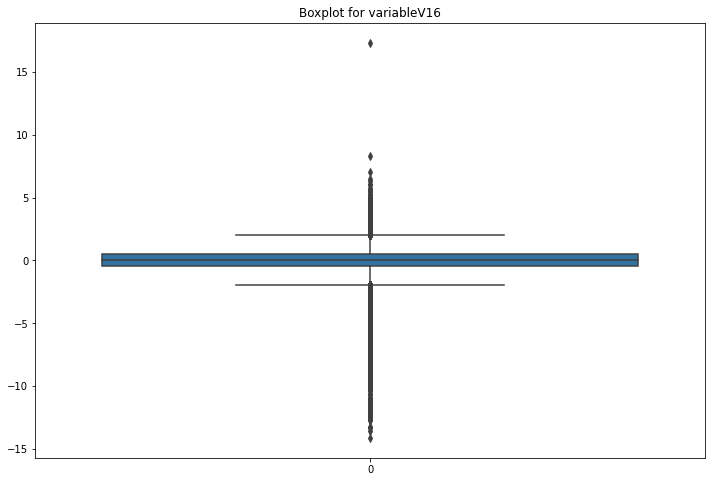

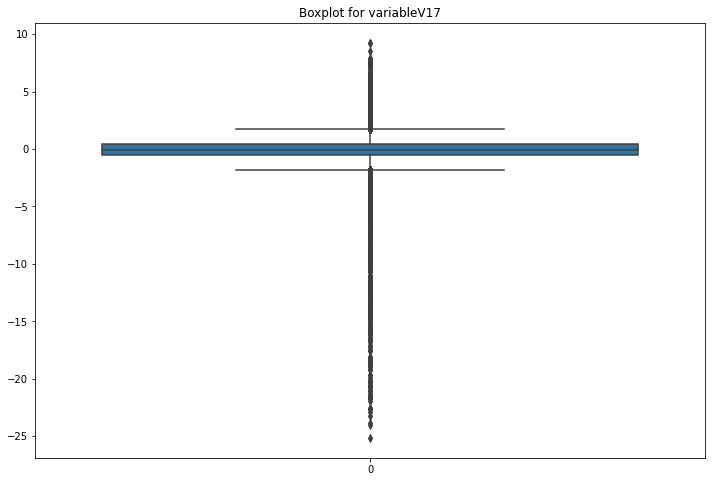

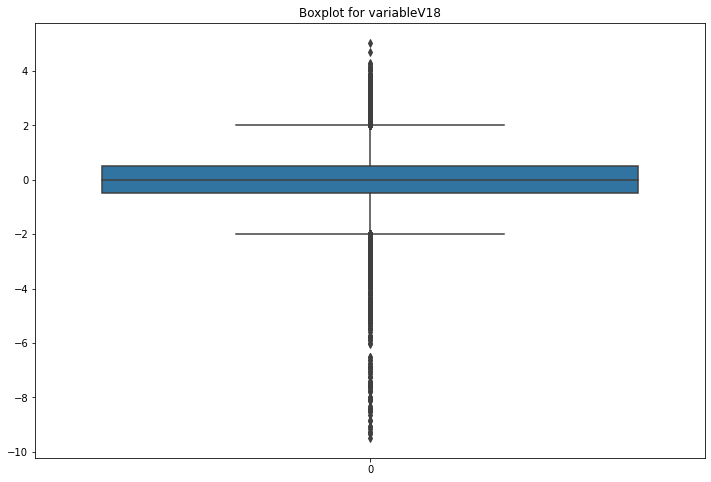

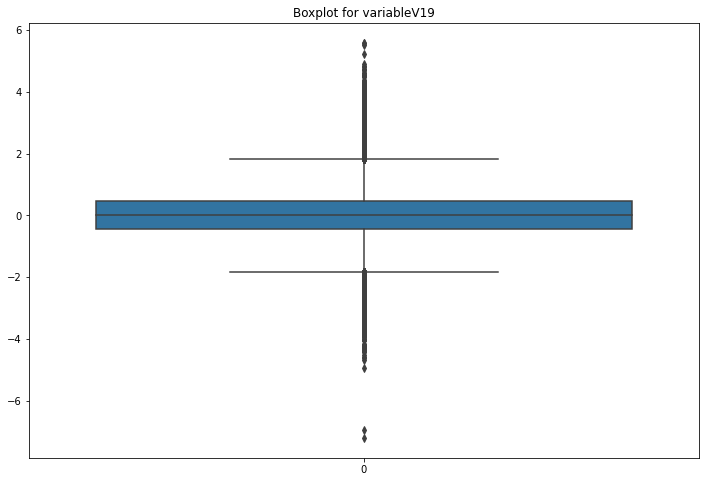

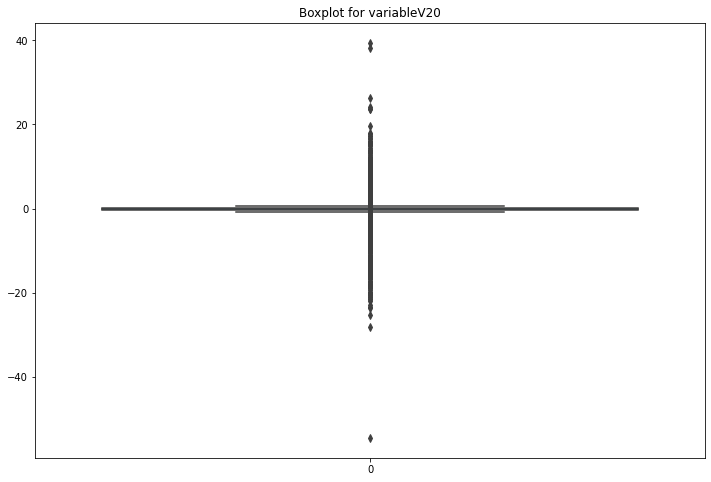

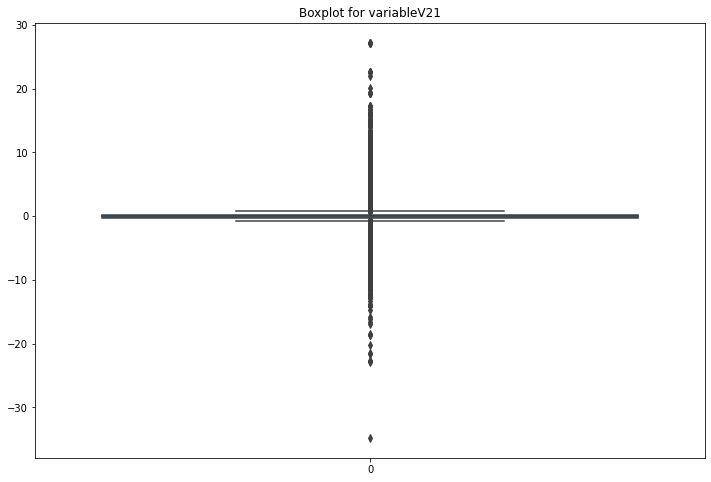

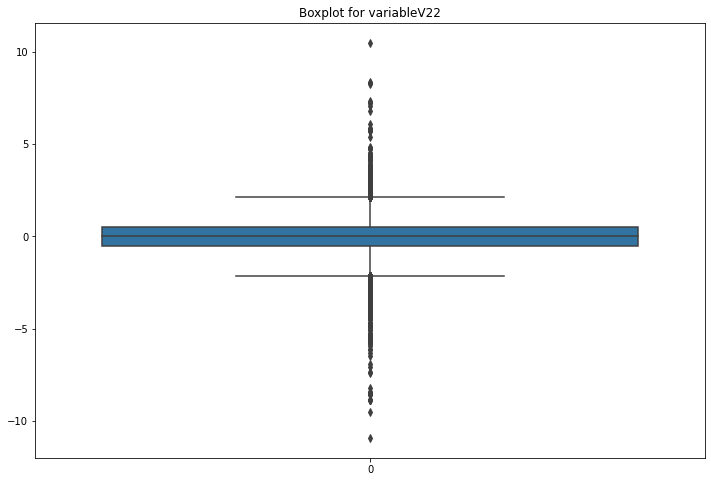

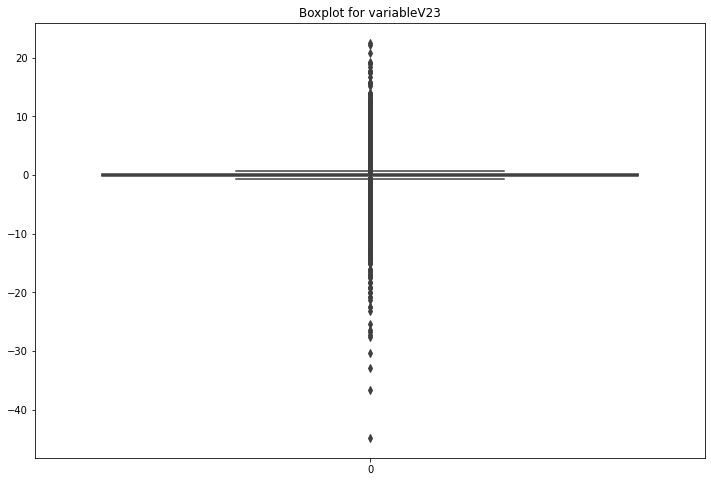

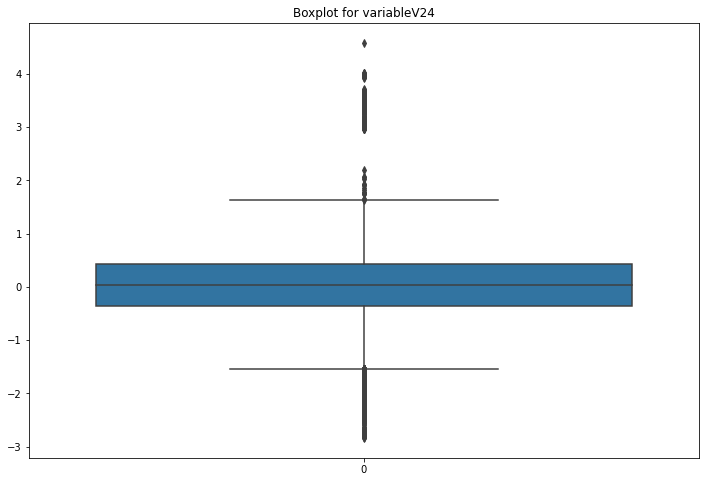

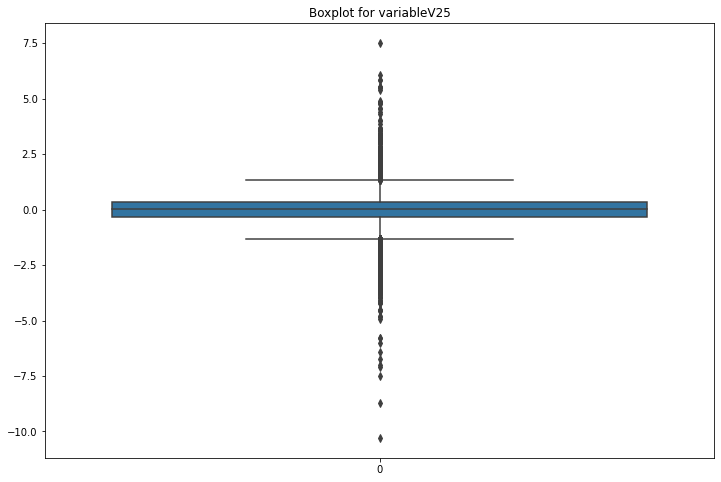

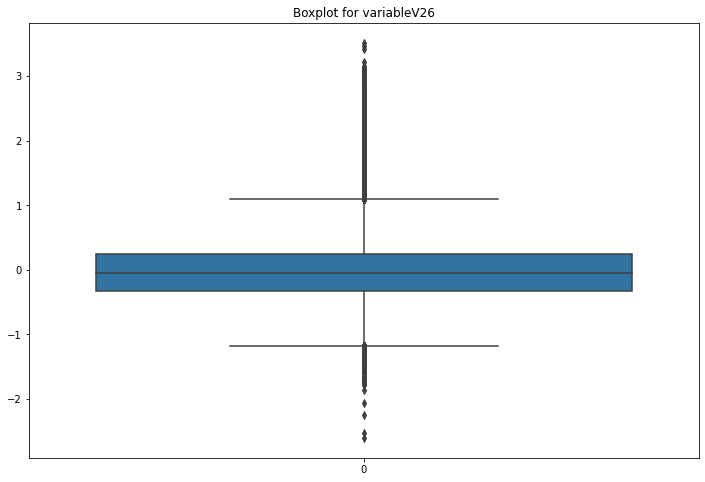

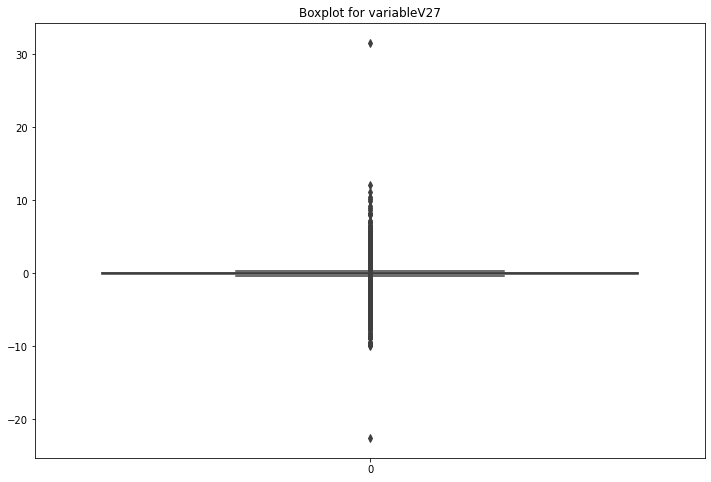

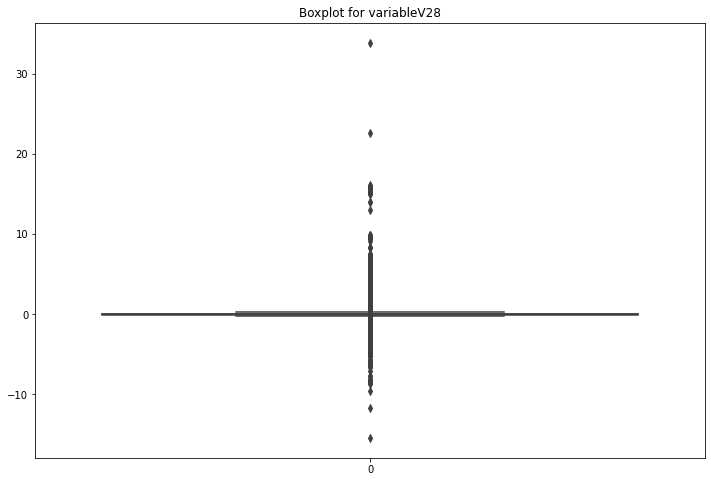

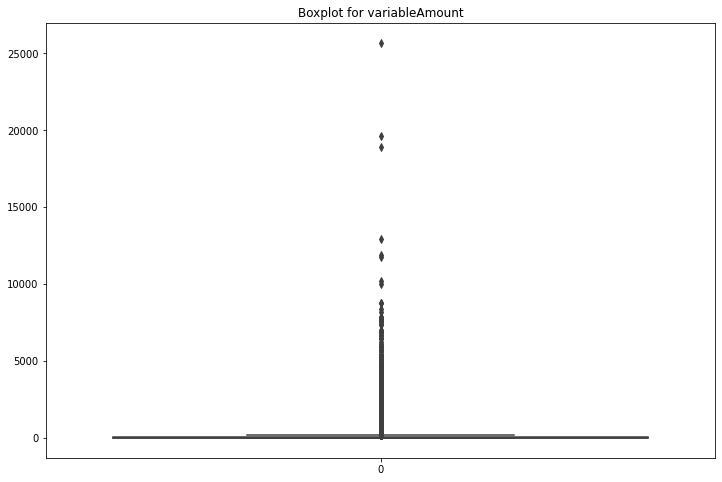

In [ ]:
#for col in train.drop(columns='Class',axis=1).columns:
# # 

for col in train_dummy.drop(['Time','Class'],axis=1).columns:
  plt.figure(figsize=(12,8))
  df=train_dummy.copy()
  sns.boxplot(data=df[col])
  plt.title('Boxplot for variable{}'.format(col))
  plt.show()

In [ ]:
for col in train.drop(['Time','Class'],axis=1).columns:
  upperlimitoutliers=train.loc[train[col]>(train[col].quantile(0.75)+1.5*(train[col].quantile(0.75)-train[col].quantile(0.25)))][[col,'Class']]
  lowerlimitoutliers=train.loc[train[col]<(train[col].quantile(0.25)-1.5*(train[col].quantile(0.75)-train[col].quantile(0.25)))][[col,'Class']]
  print('Count of upperlimit outliers is {0} and count of lower limit outliers is {1}'.format(upperlimitoutliers.count()[0],lowerlimitoutliers.count()[0]))
  print('Upperlimit outlier sum is {0} and lower limit outlier sum is {1}'.format(upperlimitoutliers[col].sum(),lowerlimitoutliers[col].sum()))


Count of upperlimit outliers is 0 and count of lower limit outliers is 7062
Upperlimit outlier sum is 0.0 and lower limit outlier sum is -51695.218716503296
Count of upperlimit outliers is 5096 and count of lower limit outliers is 8430
Upperlimit outlier sum is 23338.059811711515 and lower limit outlier sum is -45568.52075409279
Count of upperlimit outliers is 20 and count of lower limit outliers is 3343
Upperlimit outlier sum is 85.47022932136473 and lower limit outlier sum is -20336.927141111228
Count of upperlimit outliers is 8905 and count of lower limit outliers is 2243
Upperlimit outlier sum is 36817.59187954754 and lower limit outlier sum is -8274.082887790375
Count of upperlimit outliers is 8411 and count of lower limit outliers is 3884
Upperlimit outlier sum is 30930.403860744962 and lower limit outlier sum is -18845.31507770579
Count of upperlimit outliers is 21213 and count of lower limit outliers is 1752
Upperlimit outlier sum is 74334.77301096181 and lower limit outlier su

By above steps  and plots,we can see the number of outliers is huge and  we can also conclude that its not advisable to drop outliers or even replace the outliers. Clearly outliers are important . For variables **V12,V14,V16** Fraud transactions in outliers almost equal to 400 which is huge compared to overall Fraud transcations count of 492.  We can consider a theory that, if any value is a outlier in these varibles, there is a high chance of becoming a Fraudlent transaction.(It's just a hypothesis)


# Label encoding of target variable and time variable

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le_inc=LabelEncoder()
le_inc.fit(train_dummy['Time'])
train_dummy['EncodedTime'] = le_inc.transform(train_dummy['Time'])
le_inc.fit(train_dummy['Class'])
train_dummy['EncodedClass'] = le_inc.transform(train_dummy['Class'])
train_dummy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,EncodedTime,EncodedClass
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,0
284803,2.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,0
284804,2.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,0
284805,2.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,0


# Checking the correlation between variables

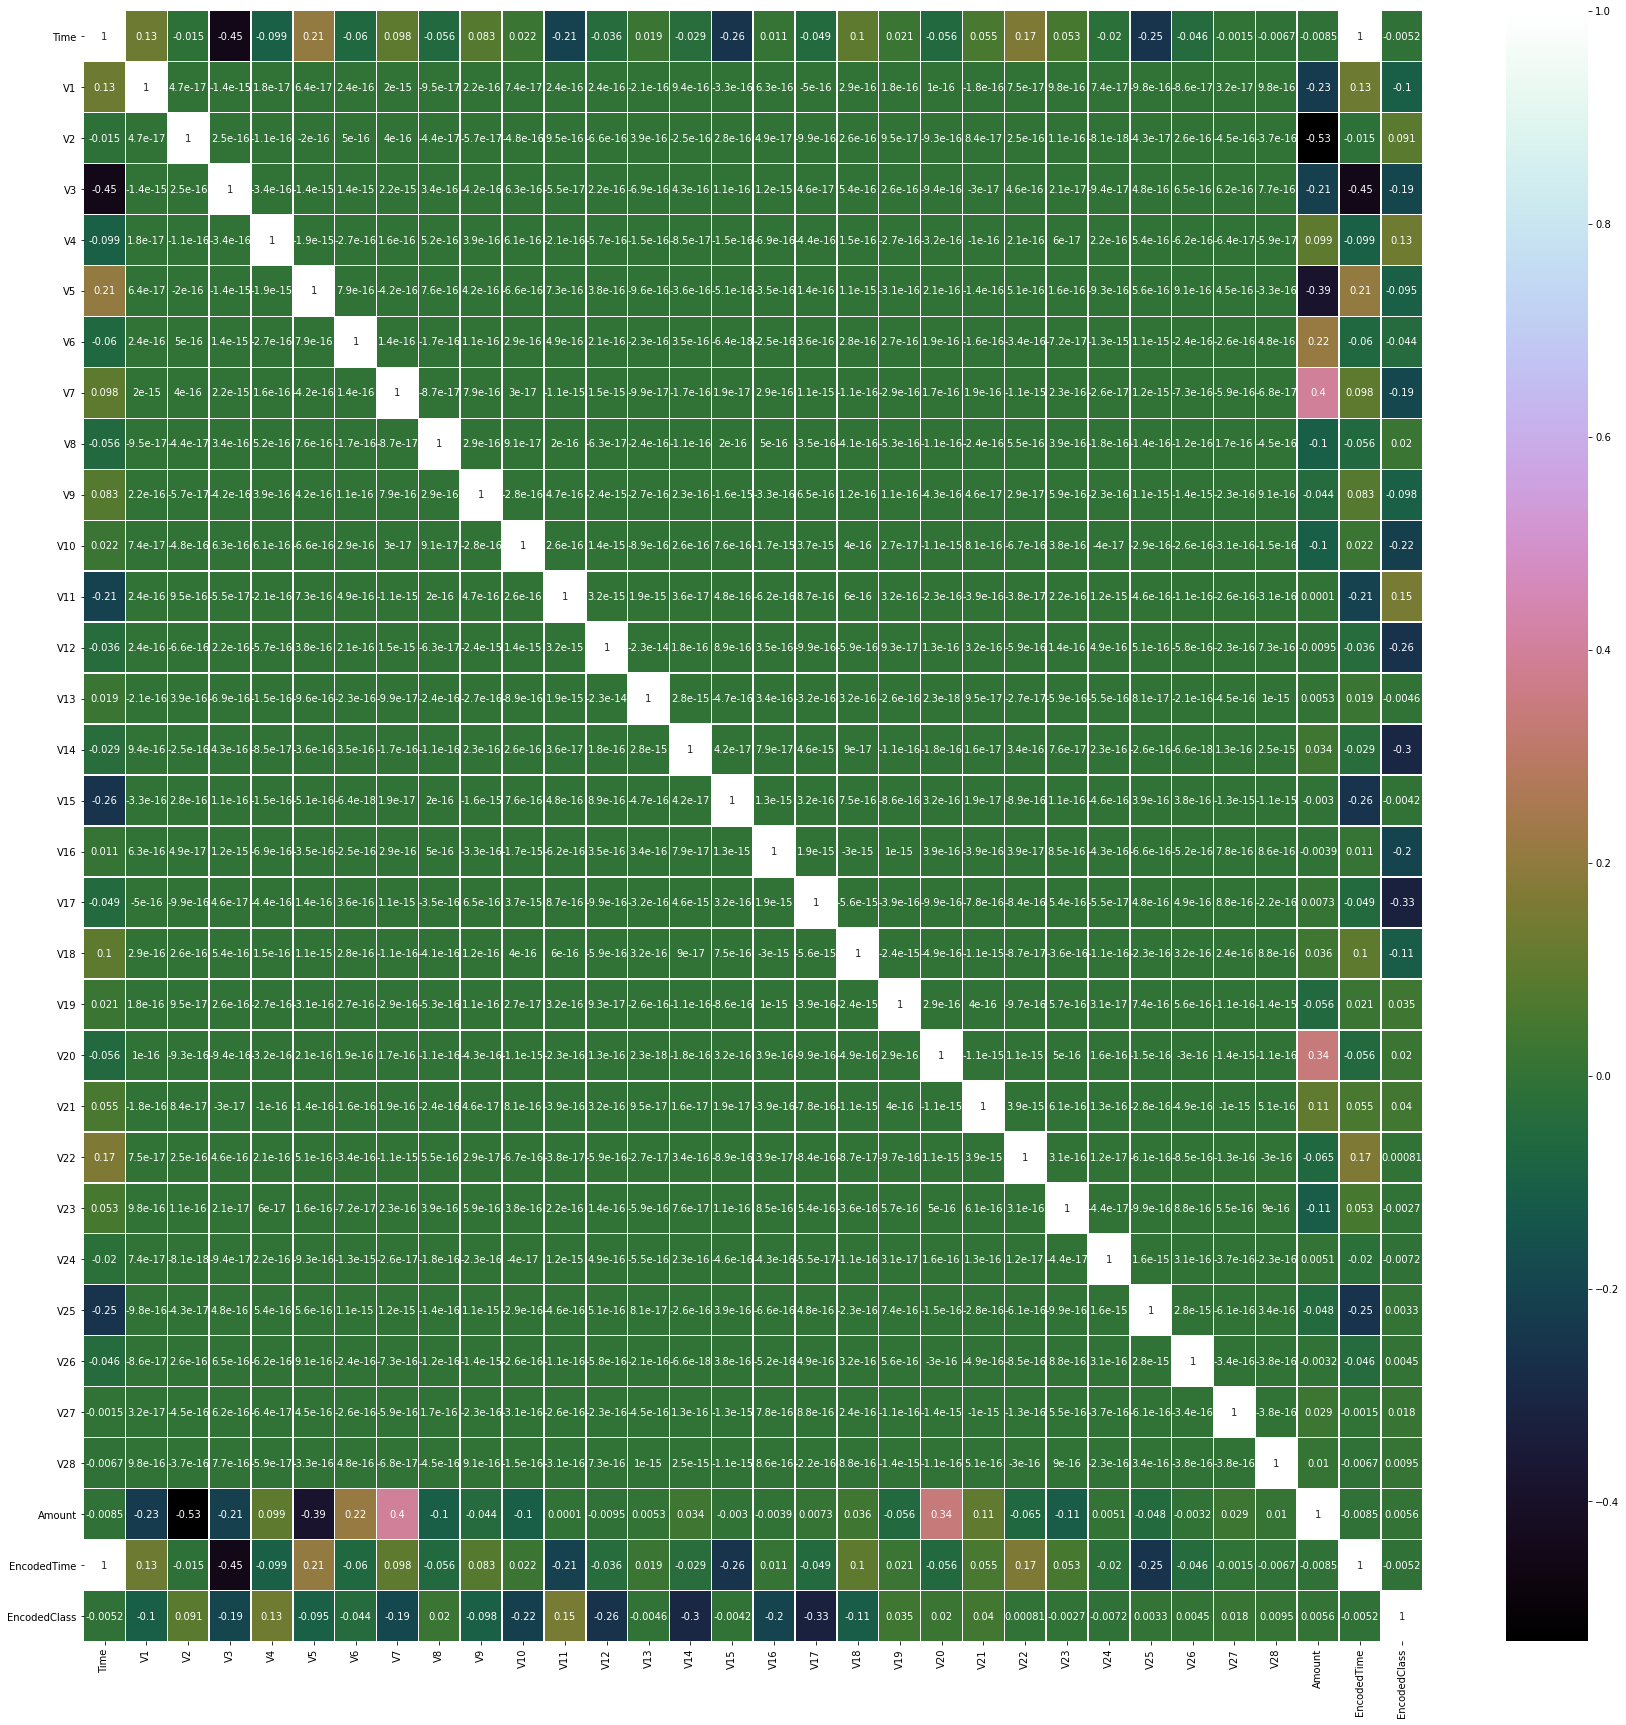

In [ ]:
plt.figure(figsize=(30,30))
corr_mat=train_dummy.corr()
sns.heatmap(corr_mat,xticklabels=corr_mat.columns,yticklabels=corr_mat.columns,mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
,linewidths=.5,cmap='cubehelix',annot=True)

Varaibles **V1,V2,......V28** has no correlation between them.
Variable **Amount** is **positevely** correlated with **V20,V7** to a factor of **0.35-0.4** (moderate correlation) and  Weakly correlated with **V6**
**Amount** is  correlated negatively with **V2,V5** to factor of **0.53,0.39** respectively.
 Weakly negatively correalted with **V1,V3**

**Class** Variable is correlated to a factor of **>=0.3** negatively with **V17,V14**(which is highest w.r.t. other variables). It is also correlated to a factor around **0.19** negativey with **V7,V3**

**Encoded time** is correlated negatively with **V3** to a factor of **0.45** . Also negatively correlated with **V11,V15,V25** to factors of **0.21,0.26,0.25** respectively

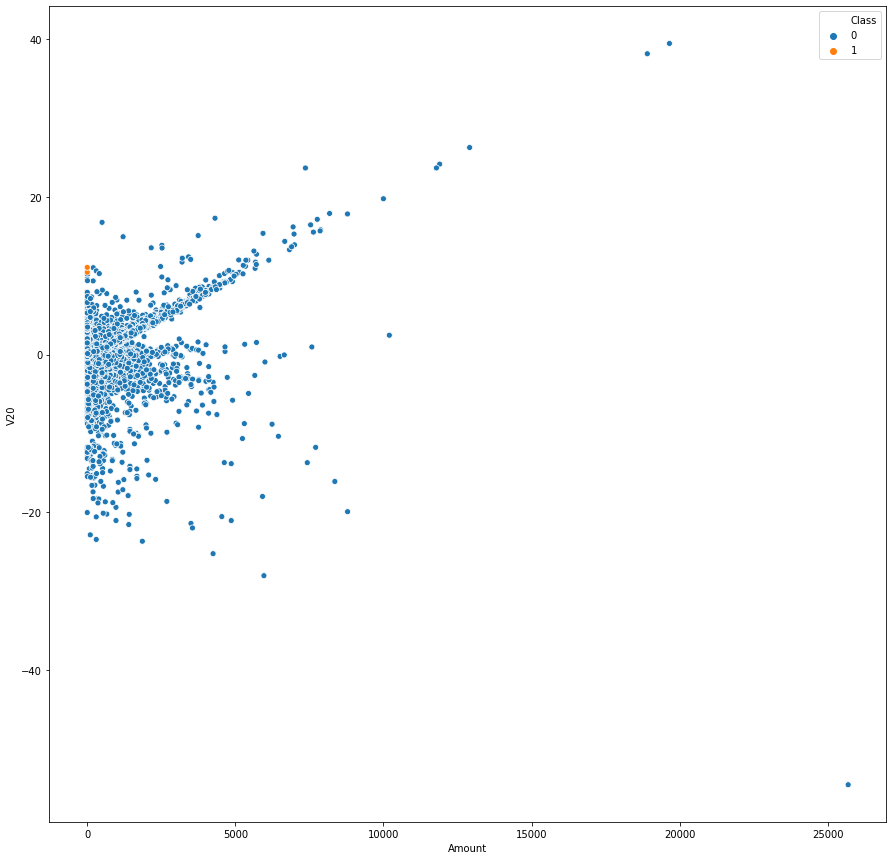

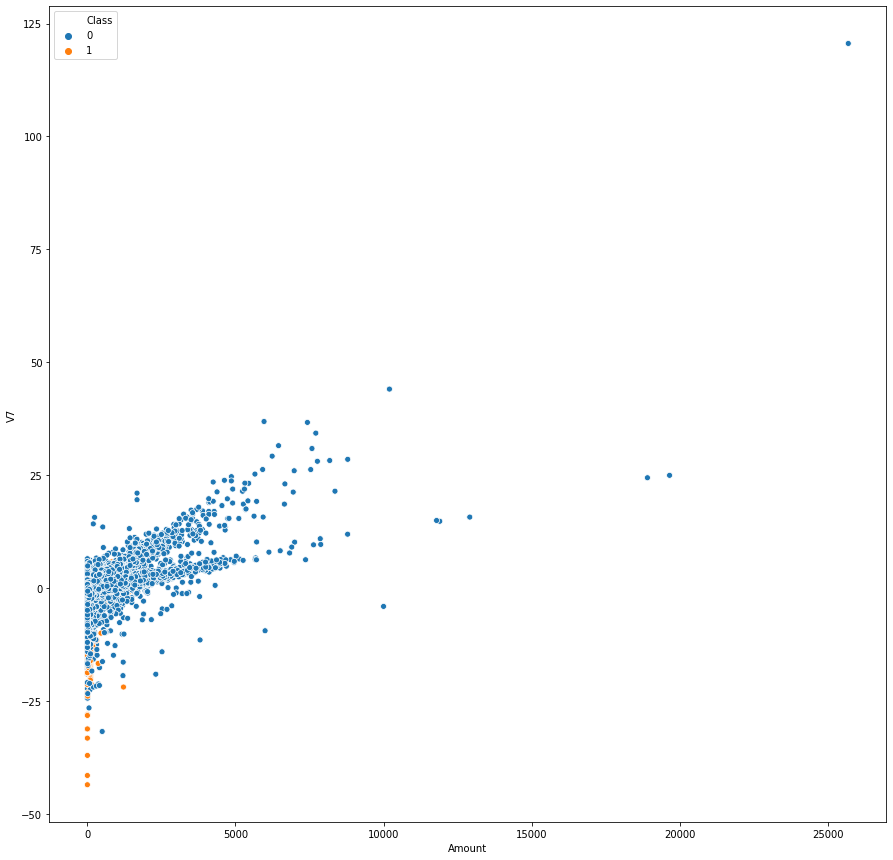

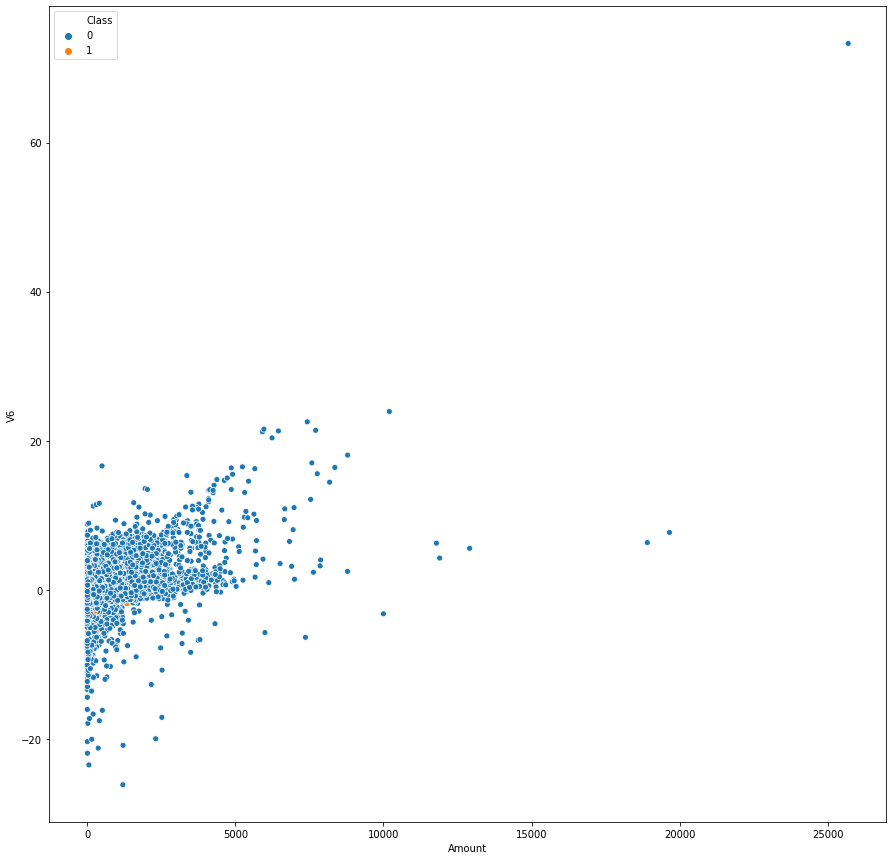

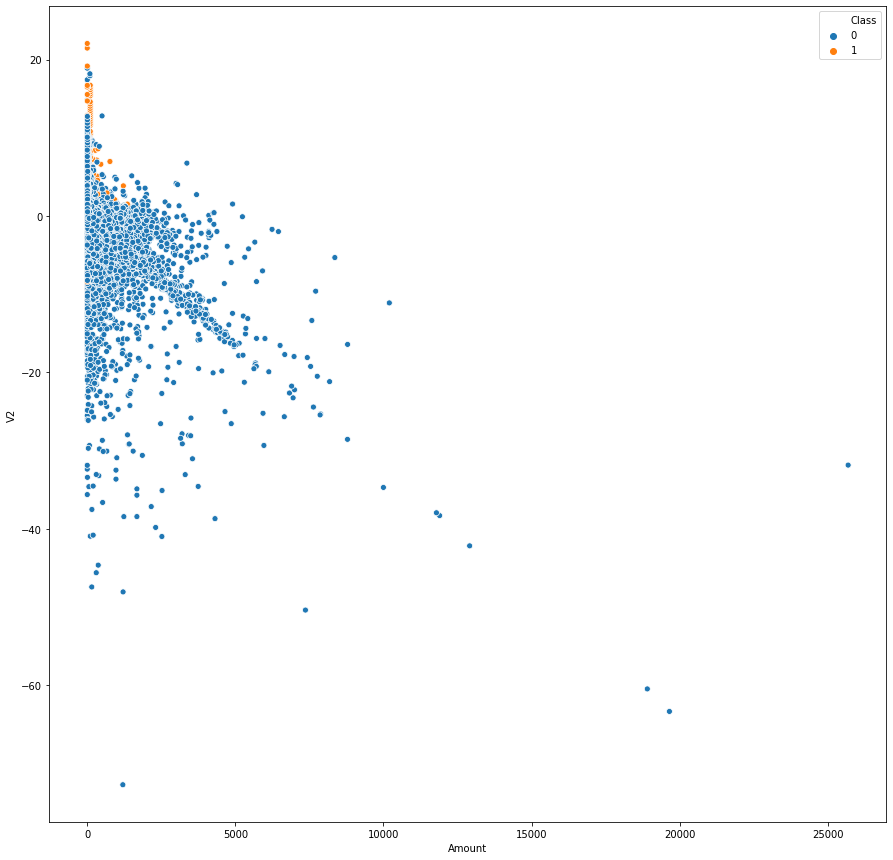

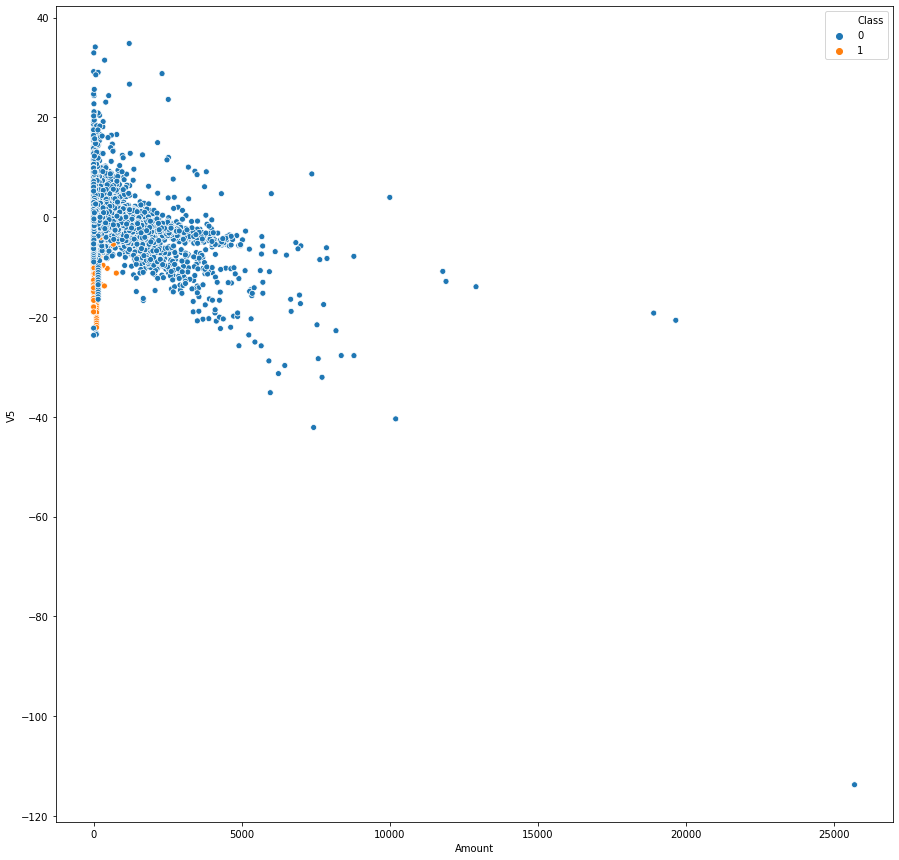

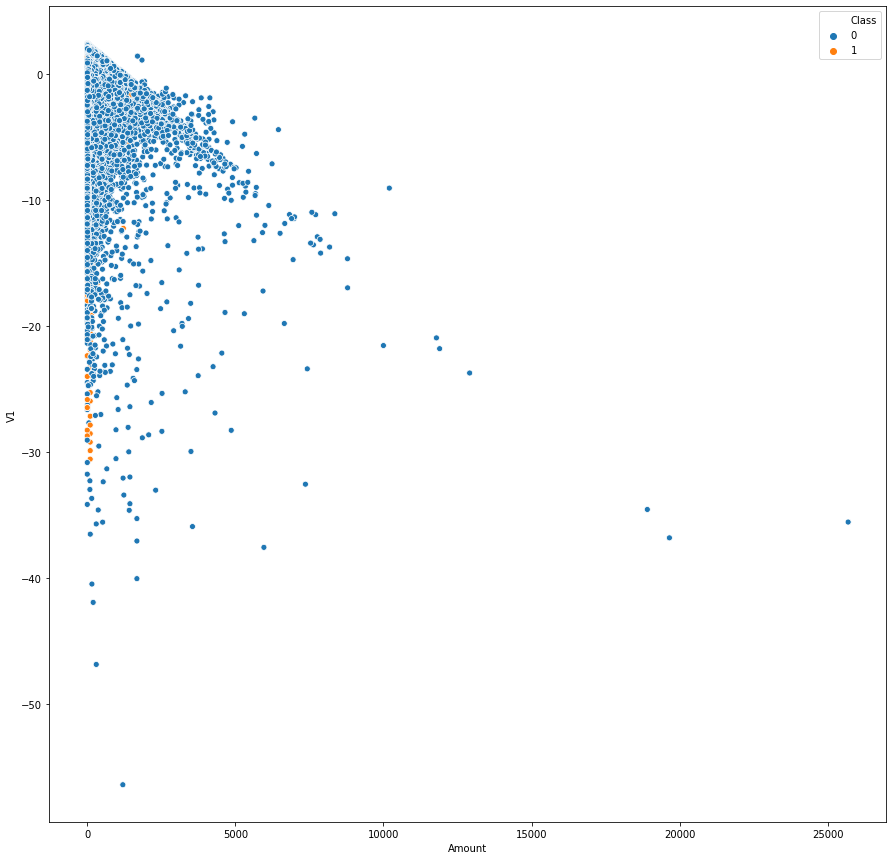

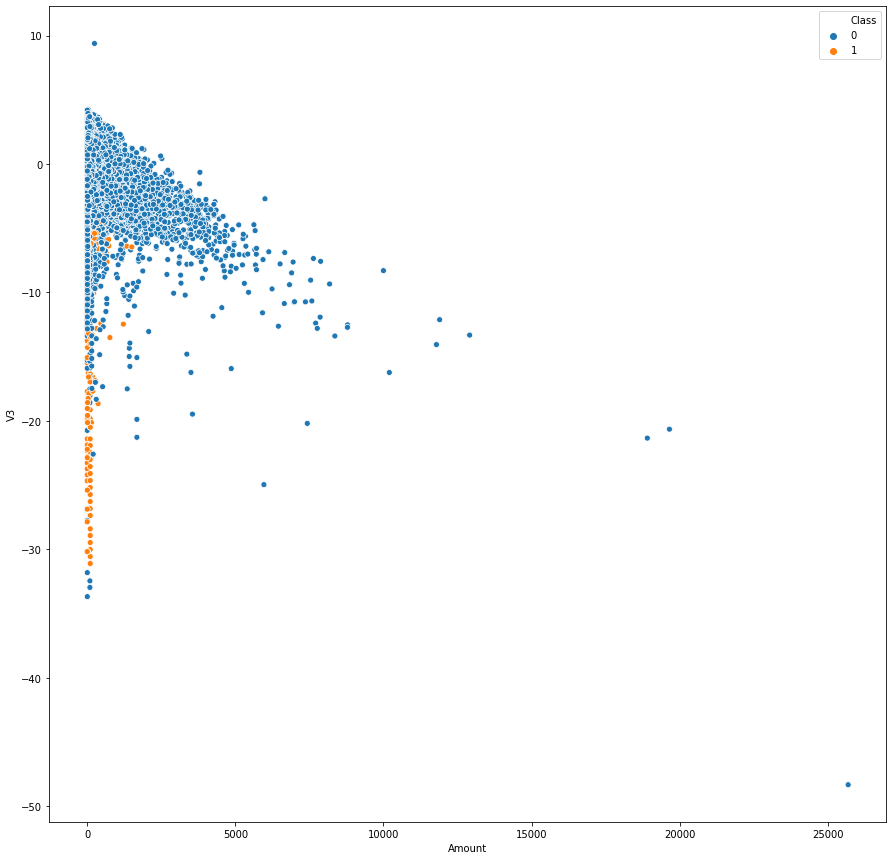

In [ ]:
amount_corr=['V20','V7','V6','V2','V5','V1','V3']

for col in amount_corr:
  plt.figure(figsize=(15,15))
  sns.scatterplot(x='Amount',y=col,data=train_dummy,hue='Class')
  plt.xlabel('Amount')
  plt.ylabel(col)
  plt.show()

All the varaibles show Partial linear relationships with Variable Amount. 

**V5,V6,V8,V9,V15,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time** don't have any correlation with target variable. So it is advisable to drop all these columns

In [ ]:
upd_df=train_dummy.drop(columns=['V2','V5','V6','V8','V9','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Time','EncodedTime'])


In [ ]:
train_dummy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,EncodedTime,EncodedClass
0,1.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0
1,1.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0
4,1.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,2.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1,0
284803,2.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,1,0
284804,2.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,1,0
284805,2.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,1,0


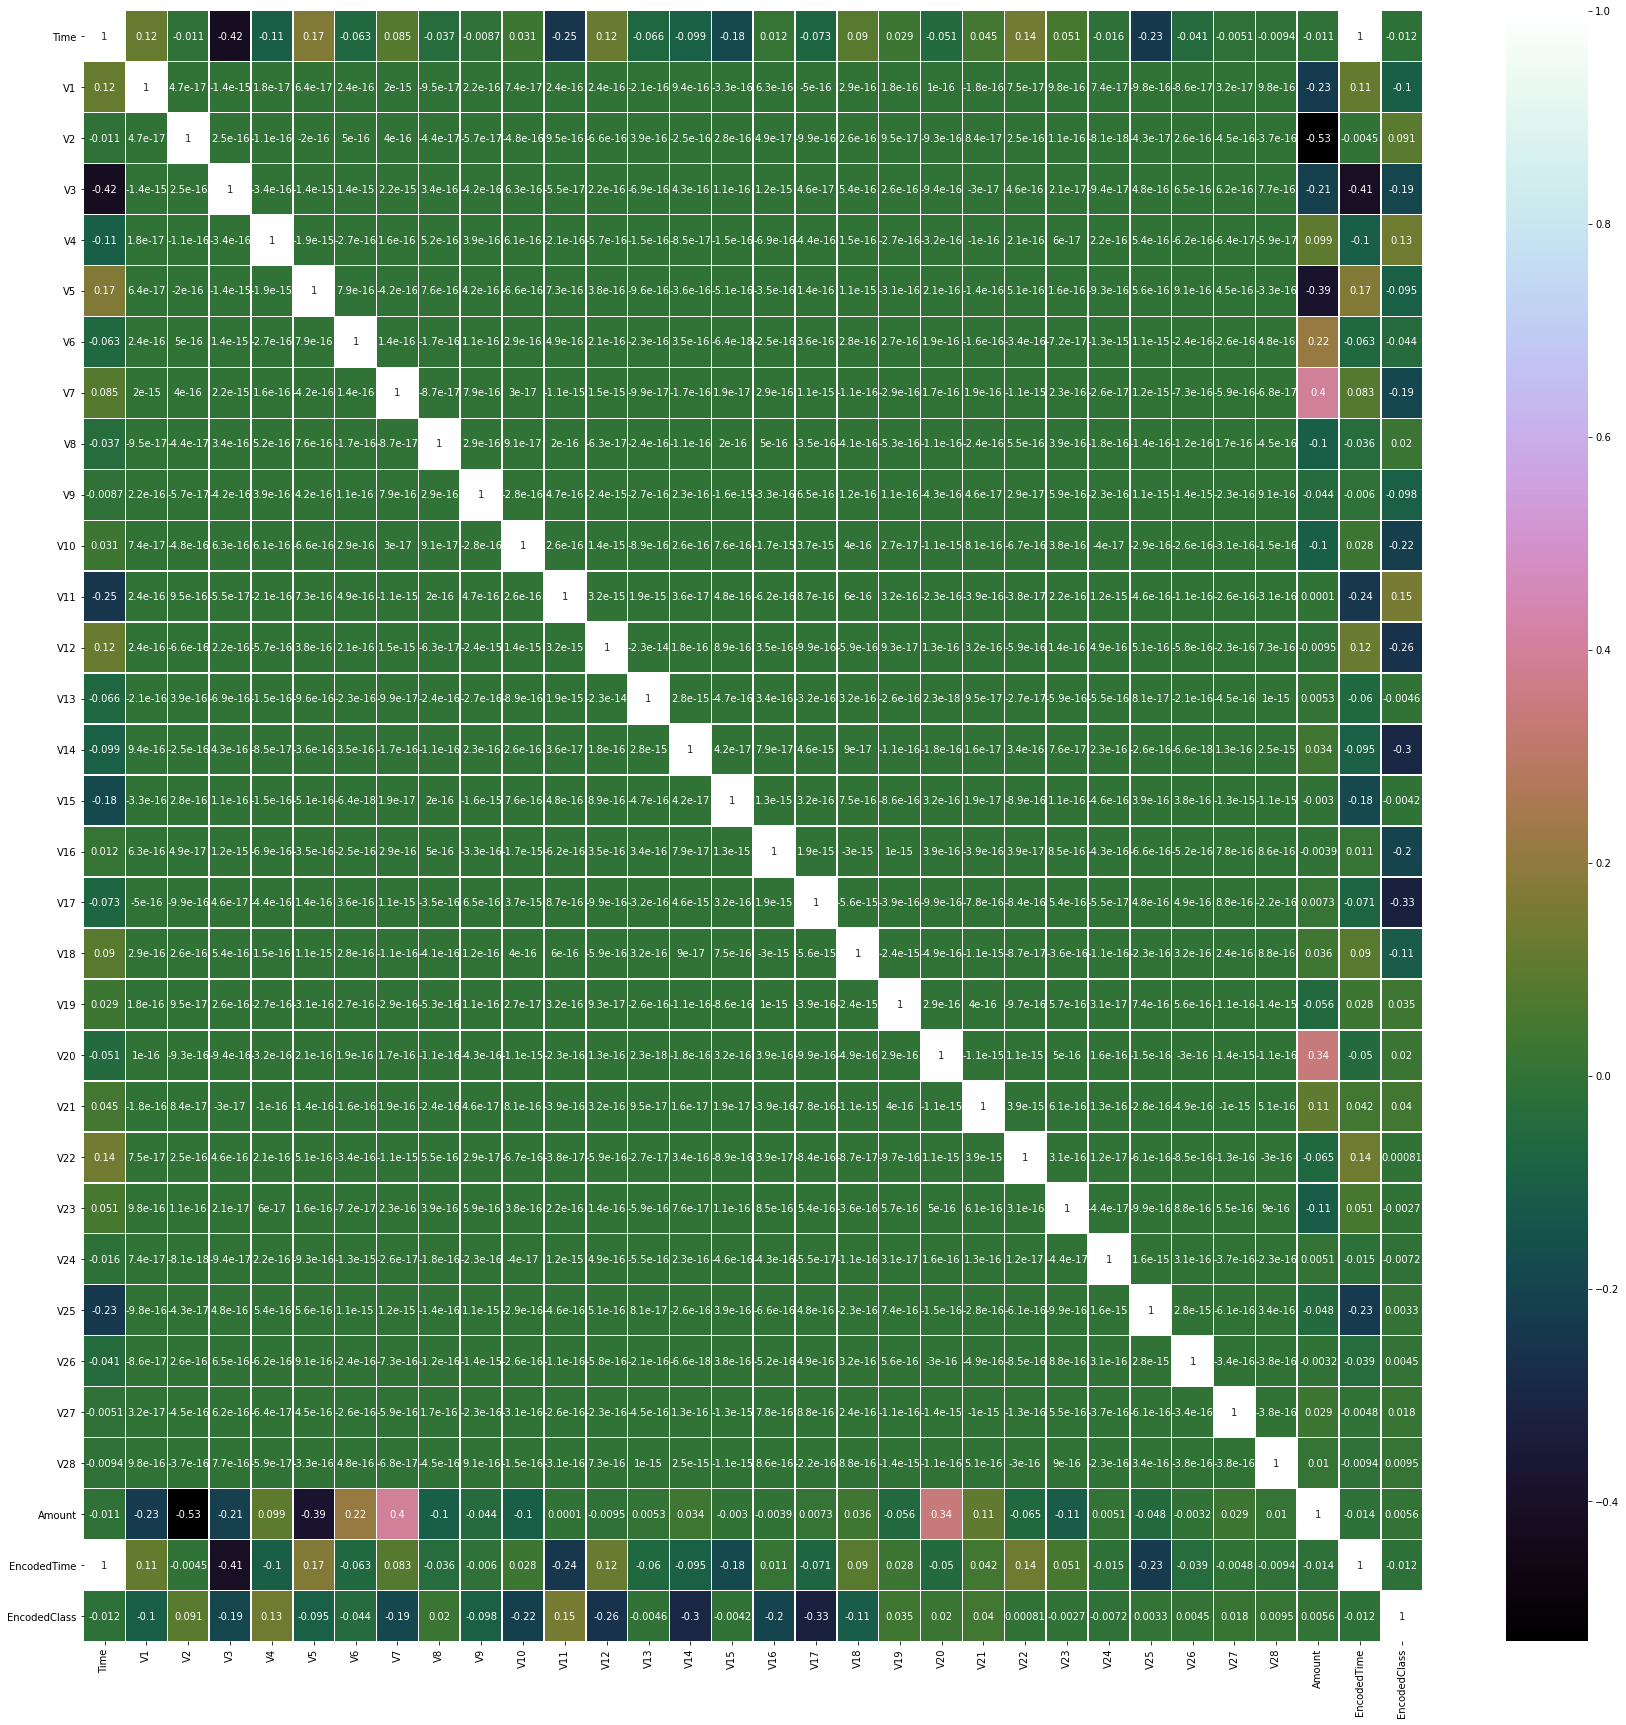

In [ ]:
plt.figure(figsize=(30,30))
corr_mat=train_dummy.corr()
sns.heatmap(corr_mat,xticklabels=corr_mat.columns,yticklabels=corr_mat.columns,linewidths=.5,cmap='cubehelix',annot=True)
plt.show()

above columns **V3,V7,V10,V11,V12,V14,V16,V17** has most of the fraud transactions in outliers. Thats why we can clearly see a relationship here with class


# Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=train_dummy['EncodedClass']
y_upd=upd_df['EncodedClass']

In [ ]:
x=train_dummy.drop(columns=['Class','EncodedClass'])
x_upd=upd_df.drop(columns=['Class','EncodedClass'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)
x_tr_upd,x_test_upd,y_tr_upd,y_test_upd=train_test_split(x_upd,y_upd,test_size=0.30,random_state=2)
print('X train shape',x_train.shape)
print('X test shape',x_test.shape)
print('Y train shape',y_train.shape)
print('Y test shape',y_test.shape)

X train shape (199364, 31)
X test shape (85443, 31)
Y train shape (199364,)
Y test shape (85443,)


In [ ]:
print('Percentage of Fraud transactions in train data set is {0}'.format(y_train[y_train['EncodedClass']==1].count()/train_dummy[train_dummy['EncodedClass']==1].count()[0]*100))
print('Percentage of Fraud transactions in test data set is {0}'.format(y_test[y_test['EncodedClass']==1].count()/train_dummy[train_dummy['EncodedClass']==1].count()[0]*100))


Percentage of Fraud transactions in train data set is EncodedClass    72.764228
dtype: float64
Percentage of Fraud transactions in test data set is EncodedClass    27.235772
dtype: float64


# Perform modelling using different models

lets do logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,log_loss,roc_auc_score,average_precision_score,roc_curve,plot_roc_curve,precision_recall_fscore_support,accuracy_score,auc
from sklearn.model_selection import RandomizedSearchCV
model_perf=[]
metr=[]

In [ ]:
logistic_regression = LogisticRegression(solver='saga', max_iter=5000)
logistic_regression.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

## Confusion matrix for logistic regression: Caluculate Precise, Recall, AUC,GiniCoefficient, logloss

Confusion matrix [[85295    14]
 [  107    27]]


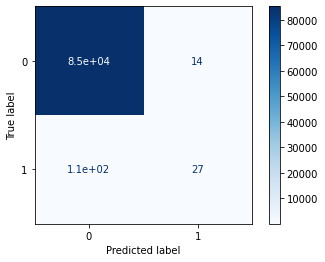

In [ ]:
y_pred = logistic_regression.predict(x_test)
print('Confusion matrix',confusion_matrix(y_test,y_pred))
disp = plot_confusion_matrix(logistic_regression, x_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

accuracy score is  0.9984434067155882
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.52      0.10      0.16       134

    accuracy                           1.00     85443
   macro avg       0.76      0.55      0.58     85443
weighted avg       1.00      1.00      1.00     85443

LogLoss is  0.05376293968718757
AUCROC value is  0.5484371301307992
Gini Coefficient for imbalanced data set 0.0968742602615984
Average precision score 0.05186390997157746


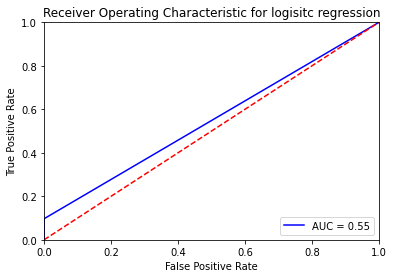

In [ ]:
print('accuracy score is ',logistic_regression.score(x_test,y_test))
print("Classification Report")
print(classification_report(y_test,y_pred))
print('LogLoss is ',log_loss(y_test,y_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_pred))-1)
print('Average precision score',average_precision_score(y_test, y_pred))
fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.title('Receiver Operating Characteristic for logisitc regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
r1 = {'Model': 'Logistic', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Logistic','accuracy': accuracy_score(y_test, y_pred),'AUROC':roc_auc_score(y_test,y_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Logistic','accuracy': accuracy_score(y_test, y_pred),'AUROC':roc_auc_score(y_test,y_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)


Here we should be more focused on Recall as they are the numbers related to Fraud Transactions

Precise , Recall , area under the curve, Gini coefficient are very low. 

In [ ]:



  #confus_df=pd.DataFrame(conf,columns=['0_Actual','1_Actual'])
  #Precison=TP(85281)/TP(85281)+FP(28)
  #precision=confus_df['0_Actual'][0]/(confus_df['0_Actual'][0]+confus_df['1_Actual']['0'])
  #recall=TN/TN+FN
  #confus_df['0_Actual'][1]/(confus_df['0_Actual'][1]+confus_df['1_Actual']['1'])
  #confus_df['1_Actual'][0]
  #print('False positive',confus_df['1_Actual'][0])
  ##print('True positive',confus_df['0_Actual'][0])
  #print('True Negative',confus_df['1_Actual'][1])
  #print('False Negative',confus_df['0_Actual'][1])
  #precision=confus_df['0_Actual'][0]/(confus_df['0_Actual'][0]+confus_df['1_Actual'][0])
  #recall=confus_df['0_Actual'][1]/(confus_df['0_Actual'][1]+confus_df['1_Actual'][1])
  #print('precison is ',precision)
  #print('precison is ',recall)



## lets check with  *decision tree* 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc_tree = DecisionTreeClassifier()
dc_tree.fit(x_train, y_train)
y_tree_pred=dc_tree.predict(x_test)

## Confusion matrix, Precise, Recall, AUC,GiniCoefficient caluculation for decision tree

Confusion matrix [[85283    26]
 [   27   107]]


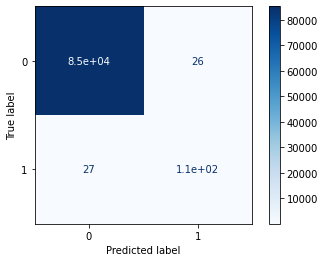

In [ ]:
print('Confusion matrix',confusion_matrix(y_test,y_tree_pred))
disp = plot_confusion_matrix(dc_tree, x_test, y_test,
                                 cmap=plt.cm.Blues)
plt.show()

accuracy score is  0.9993797034280163
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.80      0.80      0.80       134

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

AUCROC value is  0.8991013441391199
Gini Coefficient for imbalanced data set 0.7982026882782398
Average precision score 0.6427242595950512


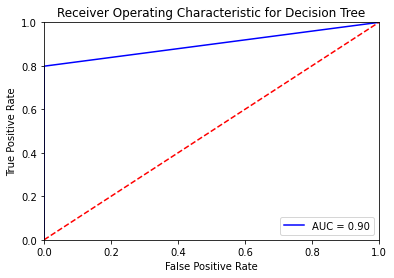

In [ ]:
print('accuracy score is ',dc_tree.score(x_test,y_test))
print("Classification Report")
print(classification_report(y_test,y_tree_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_tree_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_tree_pred))-1)
print('Average precision score',average_precision_score(y_test, y_tree_pred))
fpr, tpr, threshold = roc_curve(y_test, y_tree_pred)
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_tree_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_tree_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_tree_pred).ravel()
r1 = {'Model': 'Decision Tree', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Decision Tree','accuracy': accuracy_score(y_test, y_tree_pred),'AUROC':roc_auc_score(y_test,y_tree_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Decision Tree','accuracy': accuracy_score(y_test, y_tree_pred),'AUROC':roc_auc_score(y_test,y_tree_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)


lets check with **random forest** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_rf_pred=rf.predict(x_test)

## Confusion matrix, Precise, Recall, AUC,GiniCoefficient caluculation for random forest

accuracy score is  0.9996137776061234
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.93      0.81      0.87       134

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

AUCROC value is  0.9066695295399357
Gini Coefficient for imbalanced data set 0.8133390590798715
Average precision score 0.7581060893421007


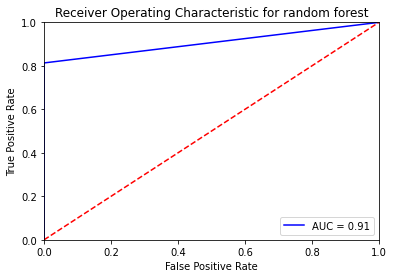

In [ ]:
print('accuracy score is ',rf.score(x_test,y_test))
print("Classification Report")
print(classification_report(y_test,y_rf_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_rf_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_rf_pred))-1)
print('Average precision score',average_precision_score(y_test, y_rf_pred))
fpr, tpr, threshold = roc_curve(y_test, y_rf_pred)
plt.title('Receiver Operating Characteristic for random forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_rf_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_rf_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_rf_pred).ravel()
r1 = {'Model': 'Random Forest', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Random Forest','accuracy': accuracy_score(y_test, y_rf_pred),'AUROC':roc_auc_score(y_test,y_rf_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Random Forest','accuracy': accuracy_score(y_test, y_rf_pred),'AUROC':roc_auc_score(y_test,y_rf_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)


## Confusion Matrix calucuation,Precise, Recall, AUC,GiniCoefficient caluculation for SVM

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='poly', C=2).fit(x_train, y_train)
y_svm_pred=svc.predict(x_test)

accuracy score is  0.9996137776061234
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.86      0.04      0.09       134

    accuracy                           1.00     85443
   macro avg       0.93      0.52      0.54     85443
weighted avg       1.00      1.00      1.00     85443

AUCROC value is  0.5223821986551784
Gini Coefficient for imbalanced data set 0.04476439731035686
Average precision score 0.03987760565672942


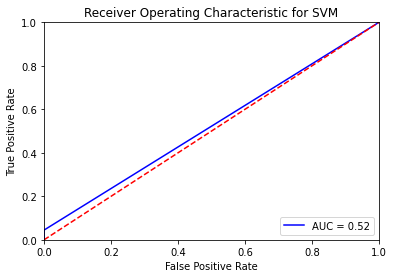

In [ ]:
print('accuracy score is ',rf.score(x_test,y_test))
print("Classification Report")
print(classification_report(y_test,y_svm_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_svm_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_svm_pred))-1)
print('Average precision score',average_precision_score(y_test, y_svm_pred))
fpr, tpr, threshold = roc_curve(y_test, y_svm_pred)
plt.title('Receiver Operating Characteristic for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_svm_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_svm_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_svm_pred).ravel()
r1 = {'Model': 'SVM', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'SVM','accuracy': accuracy_score(y_test, y_svm_pred),'AUROC':roc_auc_score(y_test,y_svm_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'SVM','accuracy': accuracy_score(y_test, y_svm_pred),'AUROC':roc_auc_score(y_test,y_svm_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)


# Logistic regression with hyper tuning parameters

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

### Perform hyper tuning by introducing penalty factor and multi fold as 5  and implementing Random Search

In [ ]:
### Random search with 5 fold
clf_random = RandomizedSearchCV(logistic_regression, param_distributions = param_grid, cv = 5, verbose=True, n_jobs=-1)
best_clf_random = clf_random.fit(x_train,y_train)
best_clf_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 57.1min finished


LogisticRegression(C=545.5594781168514, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_log_ht_pred = best_clf_random.best_estimator_.predict(x_test)

accuracy score is  0.9993679997191109
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.89      0.68      0.77       134

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443

LogLoss is  0.021828619323958597
AUCROC value is  0.8394877672965162
Gini Coefficient for imbalanced data set 0.6789755345930324
Average precision score 0.6063709797053475


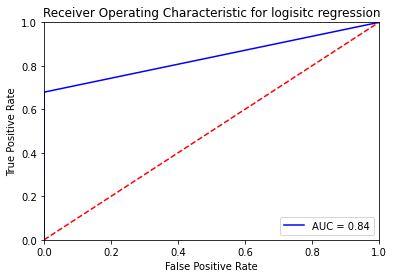

In [ ]:

print('accuracy score is ',accuracy_score(y_test, y_log_ht_pred))
print("Classification Report")
print(classification_report(y_test,y_log_ht_pred))
print('LogLoss is ',log_loss(y_test,y_log_ht_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_log_ht_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_log_ht_pred))-1)
print('Average precision score',average_precision_score(y_test, y_log_ht_pred))
fpr, tpr, threshold = roc_curve(y_test, y_log_ht_pred)
plt.title('Receiver Operating Characteristic for logisitc regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_log_ht_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_log_ht_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_log_ht_pred).ravel()
r1 = {'Model': 'Logistic', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Logistic hyper tuned','accuracy': accuracy_score(y_test, y_log_ht_pred),'AUROC':roc_auc_score(y_test,y_log_ht_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Logistic hyper tuned','accuracy': accuracy_score(y_test, y_log_ht_pred),'AUROC':roc_auc_score(y_test,y_log_ht_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)



 AUC value significantly increased to 0.84 in logistic regression with respect to 0.52 earlier


# Perfom hyper tuning for decision tree 

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [ ]:
np.linspace(start = 100, stop = 1200, num = 12)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200.])

In [ ]:
param_grid_random_2 = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : np.linspace(1, 64,64, endpoint=True),
     'min_samples_split': np.linspace(0.1,1,20,endpoint=True),
     'min_samples_leaf' : np.linspace(0.1, 0.5, 5,endpoint=True),
     'max_features' : ['auto', 'sqrt','log2'],
    }
]


param_grid_random = [    
    {'splitter' : ['best', 'random'],
     'max_depth' : np.linspace(5, 40, 4, endpoint=True),
     'min_samples_split': [2,5,10,15,25,60,100],
     'min_samples_leaf' : [1,1.25,1.5,2.5,4,6,7.5,8,12],
     'max_features' : ['auto', 'sqrt','log2'],
    }
]

In [ ]:
dt_model_random = RandomizedSearchCV(dc_tree, param_distributions = param_grid_random, cv = 5, verbose=True, n_jobs=-1)
dt_model_random.fit(x_train, y_train)
dt_model_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16.666666666666664, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=12,
                       min_samples_split=25, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [ ]:
y_dt_hyp=dt_model_random.best_estimator_.predict(x_test)

accuracy score is  0.9994382219725431
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85309
           1       0.88      0.74      0.80       134

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

AUCROC value is  0.869326791472545
Gini Coefficient for imbalanced data set 0.73865358294509
Average precision score 0.653461335568617


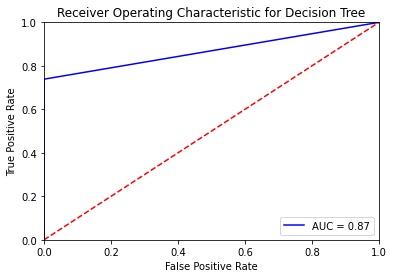

In [ ]:
print('accuracy score is ',accuracy_score(y_test, y_dt_hyp))
print("Classification Report")
print(classification_report(y_test,y_dt_hyp))
print('AUCROC value is ',roc_auc_score(y_test,y_dt_hyp))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_dt_hyp))-1)
print('Average precision score',average_precision_score(y_test, y_dt_hyp))
fpr, tpr, threshold = roc_curve(y_test, y_dt_hyp)
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_dt_hyp))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_dt_hyp)
tn, fp, fn, tp = confusion_matrix(y_test, y_dt_hyp).ravel()
r1 = {'Model': 'Decision Tree hyper tuned', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Decision Tree hyper tuned','accuracy': accuracy_score(y_test, y_dt_hyp),'AUROC':roc_auc_score(y_test,y_tree_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Decision Tree hyper tuned','accuracy': accuracy_score(y_test, y_dt_hyp),'AUROC':roc_auc_score(y_test,y_tree_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)

## Performance tuning for Random forests


In [ ]:
random_grid = { 'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2200, num = 10)],
                'max_features': ['auto', 'sqrt','log2'],
                'max_depth' : np.linspace(5, 40, 4, endpoint=True),
                'min_samples_split': [2,5,10,15,25,60,100],
                'min_samples_leaf' : [1,1.25,1.5,2.5,4,6,7.5,8,12],}

In [ ]:
rf_model_random = RandomizedSearchCV(rf, param_distributions = random_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
rf_model_random.fit(x_train, y_train)

In [ ]:
rf_model_random.best_estimator_

In [ ]:
y_rf_hy_pred=rf_model_random.best_estimator_.predict(x_test)

In [ ]:
print('accuracy score is ',accuracy_score(y_test, y_rf_hy_pred))
print("Classification Report")
print(classification_report(y_test,y_rf_hy_pred))
print('AUCROC value is ',roc_auc_score(y_test,y_rf_hy_pred))
print('Gini Coefficient for imbalanced data set',(2*roc_auc_score(y_test,y_rf_hy_pred))-1)
print('Average precision score',average_precision_score(y_test, y_rf_hy_pred))
fpr, tpr, threshold = roc_curve(y_test, y_rf_hy_pred)
plt.title('Receiver Operating Characteristic for random forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test,y_rf_hy_pred))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
precision, recall, fscore, support=precision_recall_fscore_support(y_test, y_rf_hy_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_rf_hy_pred).ravel()
r1 = {'Model': 'Random Forest', 'TN': tn, 'TP': tp, 'FN': fn, 'FP': fp}
metr.append(r1)
r2 = {'Model': 'Random Forest','accuracy': accuracy_score(y_test, y_rf_hy_pred),'AUROC':roc_auc_score(y_test,y_rf_hy_pred), 'precision': precision[0],'recall':recall[0],'f1':fscore[0], 'class':0}
r3 = {'Model': 'Random Forest','accuracy': accuracy_score(y_test, y_rf_hy_pred),'AUROC':roc_auc_score(y_test,y_rf_hy_pred), 'precision': precision[1],'recall':recall[1],'f1':fscore[1], 'class':1}
model_perf.append(r2)
model_perf.append(r3)


In [ ]:
pd.DataFrame(model_perf)

,Model,accuracy,AUROC,precision,recall,f1,class
0,Logistic,0.998443,0.548437,0.998583,0.999859,0.999221,0
1,Logistic,0.998443,0.548437,0.520000,0.097015,0.163522,1
2,Decision Tree,0.999380,0.899101,0.999684,0.999695,0.999689,0
3,Decision Tree,0.999380,0.899101,0.804511,0.798507,0.801498,1
4,Random Forest,0.999614,0.906670,0.999707,0.999906,0.999807,0
5,Random Forest,0.999614,0.906670,0.931624,0.813433,0.868526,1
6,SVM,0.998490,0.522382,0.998502,0.999988,0.999244,0
7,SVM,0.998490,0.522382,0.857143,0.044776,0.085106,1
8,Logistic hyper tuned,0.999368,0.839488,0.999496,0.999871,0.999684,0
9,Logistic hyper tuned,0.999368,0.839488,0.892157,0.679104,0.771186,1


In [ ]:
pd.DataFrame(metr)

,Model,TN,TP,FN,FP
0,Logistic,85297,13,121,12
1,Decision Tree,85283,107,27,26
2,Random Forest,85301,109,25,8
3,SVM,85308,6,128,1
4,Logistic,85298,91,43,11
5,Decision Tree hyper tuned,85296,99,35,13
